# Exploratory Data Analysis (EDA) in Tennessee Housing Data

## Created by Garry Anggadita

### Objectives 

#### 1.See the total sales of property in Nashville Housing Data from 2013 to 2016.

#### 2.Analyze the most popular area in Nashville for property.

#### 3.Analyze the Year on Year(YoY) median of property sales in Nashville.

#### 4.Difference between sale price and market value prediction (Total Value) to analyze the effectiveness of property agent work

But before we do the analysis, I'm gonna do data wrangling like handling missing values, structural errors, filter unwanted column tables, and remove duplicates to give a clean dataset for further Exploratory Data Analysis. Without any further ado, let's check it out!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [231]:
NH = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Documents\\Nashville Housing\\nashville_housing.csv")

In [232]:
NH.head(5)

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


## Remove Null Data

In [233]:
NH_null_row=NH[pd.isnull(NH.PropertyAddress)]

In [234]:
NH_null_row.shape

(29, 19)

In [235]:
NH[NH['PropertyAddress'].isnull()]

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
159,43076,025 07 0 031.00,SINGLE FAMILY,NaN,"January 15, 2016",179900,20160120-0005776,No,"COSTNER, FRED & CAROLYN","410 ROSEHILL CT, GOODLETTSVILLE, TN",0.96,CITY OF GOODLETTSVILLE,30000.0,70000.0,100000.0,1964.0,3.0,1.0,0.0
223,39432,026 01 0 069.00,VACANT RESIDENTIAL LAND,NaN,"October 23, 2015",153000,20151028-0109602,No,"SHACKLEFORD, MICHAEL C., JR.","141 TWO MILE PIKE, GOODLETTSVILLE, TN",0.17,CITY OF GOODLETTSVILLE,21100.0,121600.0,142700.0,2015.0,3.0,2.0,0.0
246,45290,026 05 0 017.00,SINGLE FAMILY,NaN,"March 29, 2016",155000,20160330-0029941,No,"TRIPP, MARVIN S. & DEBORAH YOUNG","208 EAST AVE, GOODLETTSVILLE, TN",0.20,CITY OF GOODLETTSVILLE,21100.0,130200.0,151300.0,2008.0,3.0,2.0,0.0
305,53147,026 06 0A 038.00,RESIDENTIAL CONDO,NaN,"August 25, 2016",144900,20160831-0091567,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,43080,033 06 0 041.00,SINGLE FAMILY,NaN,"January 4, 2016",170000,20160107-0001526,No,"FRANK, ZACHARY & NIKI","1129 CAMPBELL RD, GOODLETTSVILLE, TN",0.24,GENERAL SERVICES DISTRICT,35000.0,110500.0,145500.0,2000.0,3.0,2.0,0.0
533,45295,033 06 0A 002.00,SINGLE FAMILY,NaN,"March 29, 2016",210000,20160331-0030709,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,48731,033 15 0 123.00,SINGLE FAMILY,NaN,"May 5, 2016",199900,20160506-0045368,No,"COLEMAN, AARON A. & CECIL, CORRIE J.","438 W CAMPBELL RD, GOODLETTSVILLE, TN",1.39,GENERAL SERVICES DISTRICT,45000.0,90300.0,135300.0,1954.0,2.0,1.0,0.0
858,36531,034 03 0 059.00,SINGLE FAMILY,NaN,"August 13, 2015",245000,20150819-0083759,No,"DILICK, JOHN MARK & ANNETTE A.","2117 PAULA DR, MADISON, TN",1.01,GENERAL SERVICES DISTRICT,32000.0,170000.0,228300.0,1964.0,4.0,3.0,0.0
1043,46919,034 07 0B 015.00,VACANT RESIDENTIAL LAND,NaN,"April 27, 2016",40000,20160304-0020905,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1176,44264,034 16 0A 004.00,VACANT RESIDENTIAL LAND,NaN,"February 4, 2016",130000,20160205-0011327,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From This data we know that 29 row have a null Property Address , so we are gonna drop this row because we need the Property Address for future analysis and it must not be null

In [236]:
NH=NH.dropna(subset=['PropertyAddress'])

In [237]:
NH[NH['PropertyAddress'].isnull()]

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath


# Reformat Structural Error

For structural reformatting, I gonna split the property address and owner addresses into address and city. Then change the data type of the Sale Date column and reformatting the 'SalePrice' structure

In [238]:
NH['address']=NH['PropertyAddress'].str.split(',').str[0]
NH['city']=NH['PropertyAddress'].str.split(',').str[1]

In [239]:
NH.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE


In [240]:
NH= NH.drop('PropertyAddress',axis=1)

In [241]:
NH.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city
0,2045,007 00 0 125.00,SINGLE FAMILY,"April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE
1,16918,007 00 0 130.00,SINGLE FAMILY,"June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE
2,54582,007 00 0 138.00,SINGLE FAMILY,"September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE
3,43070,007 00 0 143.00,SINGLE FAMILY,"January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE
4,22714,007 00 0 149.00,SINGLE FAMILY,"October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE


In [242]:
NH['OwnerAddressSplit'] =NH['OwnerAddress'].str.split(',').str[0]
NH['OwnerCity'] =NH['OwnerAddress'].str.split(',').str[1]
NH['OwnerState'] =NH['OwnerAddress'].str.split(',').str[2]

In [243]:
NH.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,...,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,OwnerAddressSplit,OwnerCity,OwnerState
0,2045,007 00 0 125.00,SINGLE FAMILY,"April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,...,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,"June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,...,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,"September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,...,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,"January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,...,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,"October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,...,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN


In [244]:
NH= NH.drop('OwnerAddress',axis=1)

In [245]:
NH.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,TaxDistrict,...,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,OwnerAddressSplit,OwnerCity,OwnerState
0,2045,007 00 0 125.00,SINGLE FAMILY,"April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,GENERAL SERVICES DISTRICT,...,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,"June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,GENERAL SERVICES DISTRICT,...,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,"September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,GENERAL SERVICES DISTRICT,...,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,"January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,GENERAL SERVICES DISTRICT,...,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,"October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,GENERAL SERVICES DISTRICT,...,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN


In [246]:
NH['SaleDate']=pd.to_datetime(NH['SaleDate'])

In [247]:
NH['SaleDate']

0       2013-04-09
1       2014-06-10
2       2016-09-26
3       2016-01-29
4       2014-10-10
           ...    
56472   2015-05-27
56473   2015-03-02
56474   2016-08-16
56475   2016-09-07
56476   2016-09-07
Name: SaleDate, Length: 56448, dtype: datetime64[ns]

In [248]:
NH['SaleYear']= NH['SaleDate'].dt.year

In [249]:
NH['SaleQuarter']= NH['SaleDate'].dt.to_period('Q').dt.strftime('%Y-Q%q')

In [250]:
NH.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,TaxDistrict,...,Bedrooms,FullBath,HalfBath,address,city,OwnerAddressSplit,OwnerCity,OwnerState,SaleYear,SaleQuarter
0,2045,007 00 0 125.00,SINGLE FAMILY,2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,GENERAL SERVICES DISTRICT,...,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN,2013,2013-Q2
1,16918,007 00 0 130.00,SINGLE FAMILY,2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,GENERAL SERVICES DISTRICT,...,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN,2014,2014-Q2
2,54582,007 00 0 138.00,SINGLE FAMILY,2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,GENERAL SERVICES DISTRICT,...,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN,2016,2016-Q3
3,43070,007 00 0 143.00,SINGLE FAMILY,2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,GENERAL SERVICES DISTRICT,...,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN,2016,2016-Q1
4,22714,007 00 0 149.00,SINGLE FAMILY,2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,GENERAL SERVICES DISTRICT,...,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN,2014,2014-Q4


Change 'N' and 'Y' to "No" or "Yes" in 'SoldAsVacant' column

In [251]:
pd.unique(NH['SoldAsVacant'])

array(['No', 'N', 'Yes', 'Y'], dtype=object)

In [252]:
NH['SoldAsVacant']= NH['SoldAsVacant'].replace(['N','Y'],['No','Yes'])

In [253]:
pd.unique(NH['SoldAsVacant'])

array(['No', 'Yes'], dtype=object)

In [254]:
NH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56448 entries, 0 to 56476
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UniqueID           56448 non-null  int64         
 1   ParcelID           56448 non-null  object        
 2   LandUse            56448 non-null  object        
 3   SaleDate           56448 non-null  datetime64[ns]
 4   SalePrice          56448 non-null  object        
 5   LegalReference     56448 non-null  object        
 6   SoldAsVacant       56448 non-null  object        
 7   OwnerName          25243 non-null  object        
 8   Acreage            25997 non-null  float64       
 9   TaxDistrict        25997 non-null  object        
 10  LandValue          25997 non-null  float64       
 11  BuildingValue      25997 non-null  float64       
 12  TotalValue         25997 non-null  float64       
 13  YearBuilt          24145 non-null  float64       
 14  Bedrooms   

# Change data type

In this 'SalePrice' column , we need to change data type from string to integer so we could make analysis ,but there's some obstacles where saleprice format is in '100,000' and '$100000' so we will change the format first then change the data type

In [29]:
pd.to_numeric(NH['SalePrice'])

ValueError: Unable to parse string "120,000" at position 186

In [255]:
NH['SalePrice']=pd.Series(NH['SalePrice']).str.replace(",","")
NH['SalePrice']=pd.Series(NH['SalePrice']).str.replace("$","")

In [256]:
NH['SalePrice']=pd.to_numeric(NH['SalePrice'])

In [257]:
NH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56448 entries, 0 to 56476
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UniqueID           56448 non-null  int64         
 1   ParcelID           56448 non-null  object        
 2   LandUse            56448 non-null  object        
 3   SaleDate           56448 non-null  datetime64[ns]
 4   SalePrice          56448 non-null  int64         
 5   LegalReference     56448 non-null  object        
 6   SoldAsVacant       56448 non-null  object        
 7   OwnerName          25243 non-null  object        
 8   Acreage            25997 non-null  float64       
 9   TaxDistrict        25997 non-null  object        
 10  LandValue          25997 non-null  float64       
 11  BuildingValue      25997 non-null  float64       
 12  TotalValue         25997 non-null  float64       
 13  YearBuilt          24145 non-null  float64       
 14  Bedrooms   

# Drop Duplicates

In [258]:
NH[NH.duplicated(['address','SalePrice','SaleDate','LegalReference'])]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,TaxDistrict,...,Bedrooms,FullBath,HalfBath,address,city,OwnerAddressSplit,OwnerCity,OwnerState,SaleYear,SaleQuarter
57,4515,018 00 0 096.00,VACANT RES LAND,2013-06-28,250000,20130709-0070947,No,"BUCHANAN, DONALD W. & SANDRA R.",3.00,CITY OF GOODLETTSVILLE,...,NaN,NaN,NaN,0 BRICK CHURCH PIKE,GOODLETTSVILLE,0 BRICK CHURCH PIKE,GOODLETTSVILLE,TN,2013,2013-Q2
1854,52017,043 06 0 006.00,VACANT RESIDENTIAL LAND,2016-07-20,55000,20160722-0075671,Yes,"B & N CONSTRUCTION, LLC",1.31,GENERAL SERVICES DISTRICT,...,NaN,NaN,NaN,0 ANDERSON LN,MADISON,0 ANDERSON LN,MADISON,TN,2016,2016-Q3
1971,54651,043 10 0A 015.00,RESIDENTIAL CONDO,2016-09-14,123000,20160919-0098102,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,555 N DUPONT AVE,MADISON,NaN,NaN,NaN,2016,2016-Q3
1972,54652,043 10 0A 024.00,RESIDENTIAL CONDO,2016-09-14,123000,20160919-0098102,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,555 N DUPONT AVE,MADISON,NaN,NaN,NaN,2016,2016-Q3
1980,34809,043 10 0A 040.00,RESIDENTIAL CONDO,2015-07-10,128000,20150715-0068833,No,NaN,NaN,NaN,...,NaN,NaN,NaN,555 N DUPONT AVE,MADISON,NaN,NaN,NaN,2015,2015-Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54791,1630,181 02 0A 267.00,VACANT RES LAND,2013-04-30,366800,20130502-0044406,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,8605 PECKHAM LN,ANTIOCH,NaN,NaN,NaN,2013,2013-Q2
54792,1631,181 02 0A 268.00,VACANT RES LAND,2013-04-30,366800,20130502-0044406,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,8605 PECKHAM LN,ANTIOCH,NaN,NaN,NaN,2013,2013-Q2
54793,1632,181 02 0A 269.00,VACANT RES LAND,2013-04-30,366800,20130502-0044406,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,8605 PECKHAM LN,ANTIOCH,NaN,NaN,NaN,2013,2013-Q2
54795,1633,181 02 0A 270.00,VACANT RES LAND,2013-04-30,366800,20130502-0044406,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,8605 PECKHAM LN,ANTIOCH,NaN,NaN,NaN,2013,2013-Q2


Based on data there's 991 duplicates row which is gonna be drop

In [259]:
NH.iloc[1971:1976]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,TaxDistrict,...,Bedrooms,FullBath,HalfBath,address,city,OwnerAddressSplit,OwnerCity,OwnerState,SaleYear,SaleQuarter
1985,56094,043 10 0A 051.00,RESIDENTIAL CONDO,2016-10-21,62500,20161025-0112568,No,NaN,NaN,NaN,...,NaN,NaN,NaN,555 N DUPONT AVE,MADISON,NaN,NaN,NaN,2016,2016-Q4
1986,54653,043 10 0A 054.00,RESIDENTIAL CONDO,2016-09-30,48000,20161012-0107968,No,NaN,NaN,NaN,...,NaN,NaN,NaN,555 N DUPONT AVE,MADISON,NaN,NaN,NaN,2016,2016-Q3
1987,44111,043 10 0A 058.00,RESIDENTIAL CONDO,2016-02-12,88000,20160216-0014622,No,NaN,NaN,NaN,...,NaN,NaN,NaN,555 N DUPONT AVE,MADISON,NaN,NaN,NaN,2016,2016-Q1
1988,34811,043 10 0A 059.00,RESIDENTIAL CONDO,2015-07-10,177000,20150715-0068836,No,NaN,NaN,NaN,...,NaN,NaN,NaN,555 N DUPONT AVE,MADISON,NaN,NaN,NaN,2015,2015-Q3
1989,41975,043 10 0A 060.00,RESIDENTIAL CONDO,2015-12-18,51000,20151222-0128944,No,NaN,NaN,NaN,...,NaN,NaN,NaN,555 N DUPONT AVE,MADISON,NaN,NaN,NaN,2015,2015-Q4


In [260]:
NH=NH.drop_duplicates(['address','SalePrice','SaleDate','LegalReference'])

In [261]:
NH

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,TaxDistrict,...,Bedrooms,FullBath,HalfBath,address,city,OwnerAddressSplit,OwnerCity,OwnerState,SaleYear,SaleQuarter
0,2045,007 00 0 125.00,SINGLE FAMILY,2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,GENERAL SERVICES DISTRICT,...,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN,2013,2013-Q2
1,16918,007 00 0 130.00,SINGLE FAMILY,2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,GENERAL SERVICES DISTRICT,...,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN,2014,2014-Q2
2,54582,007 00 0 138.00,SINGLE FAMILY,2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,GENERAL SERVICES DISTRICT,...,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN,2016,2016-Q3
3,43070,007 00 0 143.00,SINGLE FAMILY,2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,GENERAL SERVICES DISTRICT,...,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN,2016,2016-Q1
4,22714,007 00 0 149.00,SINGLE FAMILY,2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,GENERAL SERVICES DISTRICT,...,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN,2014,2014-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,2015-05-27,157500,20150608-0053286,No,NaN,NaN,NaN,...,NaN,NaN,NaN,1435 WINDING CREEK DR,NOLENSVILLE,NaN,NaN,NaN,2015,2015-Q2
56473,27707,188 10 0A 107.00,SINGLE FAMILY,2015-03-02,145000,20150304-0019013,No,NaN,NaN,NaN,...,NaN,NaN,NaN,1423 WINDING CREEK DR,NOLENSVILLE,NaN,NaN,NaN,2015,2015-Q1
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,1804 GRACE POINT LN,NOLENSVILLE,NaN,NaN,NaN,2016,2016-Q3
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,2016-09-07,93844,20160919-0098411,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,1709 PARK TERRACE LN,NOLENSVILLE,NaN,NaN,NaN,2016,2016-Q3


# Drop Unwanted Column

In [262]:
NH= NH.drop(['LegalReference','OwnerName','TaxDistrict','OwnerAddressSplit','OwnerCity','OwnerState'],axis=1)

In [263]:
NH.shape

(55457, 18)

# Exploratory Data Analysis (EDA)

In [264]:
NH.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
0,2045,007 00 0 125.00,SINGLE FAMILY,2013-04-09,240000,No,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,2013,2013-Q2
1,16918,007 00 0 130.00,SINGLE FAMILY,2014-06-10,366000,No,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,2014,2014-Q2
2,54582,007 00 0 138.00,SINGLE FAMILY,2016-09-26,435000,No,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,2016,2016-Q3
3,43070,007 00 0 143.00,SINGLE FAMILY,2016-01-29,255000,No,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,2016,2016-Q1
4,22714,007 00 0 149.00,SINGLE FAMILY,2014-10-10,278000,No,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,2014,2014-Q4


In [265]:
NH_YoY_SalePrice= NH.groupby(['LandUse']).median([''])['SalePrice'].round(2).reset_index().sort_values('SalePrice',ascending=False)

In [266]:
def format_number(x) :
    if x>1e6 :
        s = '{:1.1f}M'.format(x*1e-6)
    else :
        s = '{:1.0f}K'.format(x*1e-3)
    return s

In [267]:
NH_YoY_SalePrice['SalePriceFormatted']=NH_YoY_SalePrice['SalePrice'].apply(format_number)

In [268]:
NH_YoY_SalePrice

,LandUse,SalePrice,SalePriceFormatted
0,APARTMENT: LOW RISE (BUILT SINCE 1960),2000000.0,2.0M
6,DAY CARE CENTER,1577500.0,1.6M
12,LIGHT MANUFACTURING,1200000.0,1.2M
32,VACANT COMMERCIAL LAND,925000.0,925K
28,SPLIT CLASS,525000.0,525K
9,FOREST,499900.0,500K
11,GREENBELT/RES\r\nGRRENBELT/RES,499900.0,500K
29,STRIP SHOPPING CENTER,424900.0,425K
27,SMALL SERVICE SHOP,400000.0,400K
17,NON-PROFIT CHARITABLE SERVICE,377500.0,378K


In [269]:
NH.groupby(['LandUse']).sum([''])['SalePrice'].reset_index().sort_values('SalePrice',ascending=False)

,LandUse,SalePrice
26,SINGLE FAMILY,9558640037
24,RESIDENTIAL CONDO,5373585906
34,VACANT RESIDENTIAL LAND,1146619353
8,DUPLEX,356548811
33,VACANT RES LAND,336192506
3,CONDO,260211826
38,ZERO LOT LINE,130238608
32,VACANT COMMERCIAL LAND,55000000
23,RESIDENTIAL COMBO/MISC,31713034
1,CHURCH,27739500


#### Reformat Structural Error
'LandUse' column, we see another typo name which is 'VACANT RES LAND' and 'VACANT RESIENTIAL LAND' should be 'VACANT RESIDENTIAL LAND' that can causing an error, so we gonna reformat this column name.

In [270]:
NH['LandUse']=NH['LandUse'] .replace(['VACANT RES LAND','VACANT RESIENTIAL LAND'],['VACANT RESIDENTIAL LAND','VACANT RESIDENTIAL LAND'])

In [271]:
NH['LandUse']=NH['LandUse'] .replace(['GREENBELT/RES\r\nGRRENBELT/RES'],['GREENBELT'])

In [272]:
NH.groupby(['LandUse']).sum([''])['SalePrice'].reset_index().sort_values('SalePrice', ascending=False)

,LandUse,SalePrice
25,SINGLE FAMILY,9558640037
23,RESIDENTIAL CONDO,5373585906
32,VACANT RESIDENTIAL LAND,1483869501
8,DUPLEX,356548811
3,CONDO,260211826
35,ZERO LOT LINE,130238608
31,VACANT COMMERCIAL LAND,55000000
22,RESIDENTIAL COMBO/MISC,31713034
1,CHURCH,27739500
30,TRIPLEX,25170126


## Spotting Outliers 

    To Spotting Outliers we are gonna use Boxplot to identify which 'land use' that have outliers on Sale Price, In other words we are gonna analyze the outliers in every single Land Use feature, because different building gonna have totally different Sale Price, it's gonna be wise to analyze every single data based on Land use. However, as remainder, Sale Price is follow Fair Market Value (FMV) and its relate with Comparative Data Analysis (CMA) that prepared by agents and prevalently varies in interpretation. Moreover the sale year range between 2013 to 2016 gonna give a different price even though have similar characteristic ,So there's many consideration to drop or not the outliers.

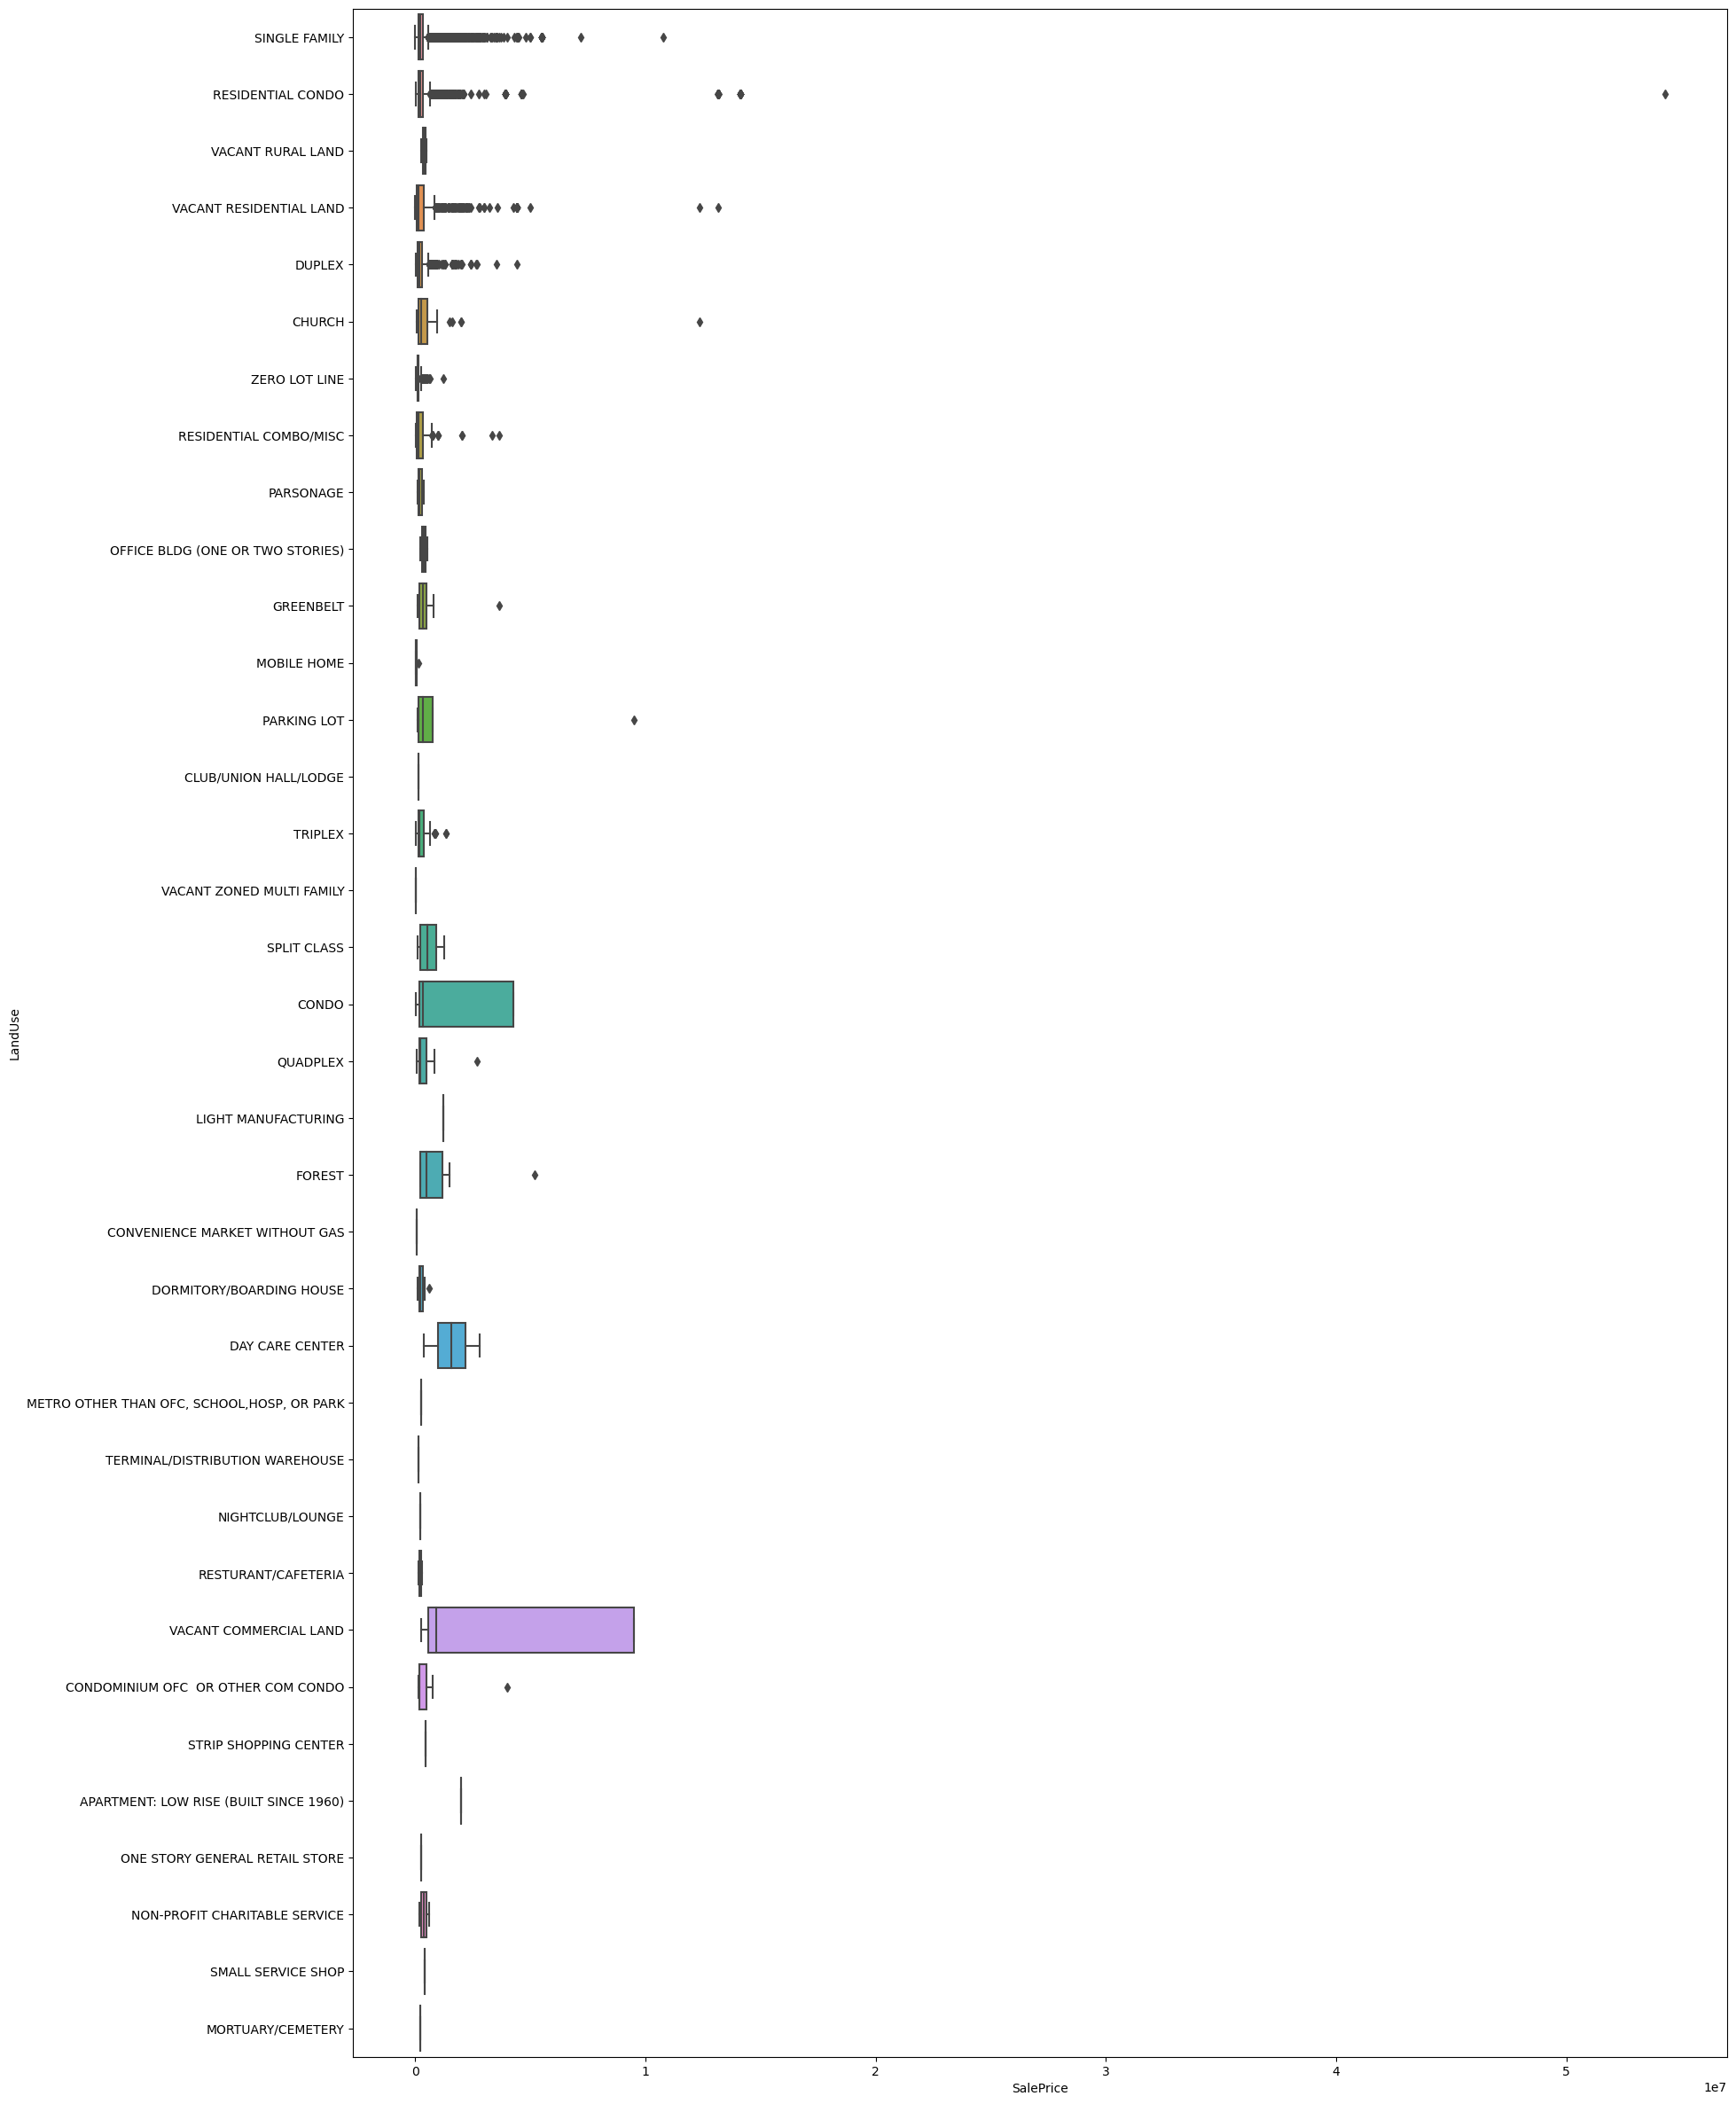

In [273]:
plt.figure(figsize=(20,30))
sns.boxplot(data=NH, x='SalePrice', y='LandUse')
plt.show()

### Analysis

Based on data visualization above , we are gonna focus on some land use category such as Single Family, Residential Condo, Vacant Residential Land, Duplex, Church, Zero Lot Line, Residential Combo/Misc, Green Belt, Mobile Home, Parking Lot, Triplex, Quadplex, Forest, Dormitory or Boarding House, Condominium ofc or Other Com Condo because they have conspicuous outliers and some suspicious skew category (Vacant Commercial Land & Condo)

In [274]:
NH_RD= (NH['LandUse']=='RESIDENTIAL CONDO')
Residential_Condo = NH[NH_RD]
Residential_Condo

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
12,34751,007 14 0B 010.00,RESIDENTIAL CONDO,2015-07-13,190000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900 TINNIN RD,GOODLETTSVILLE,2015,2015-Q3
292,33049,026 06 0A 003.00,RESIDENTIAL CONDO,2015-06-25,149000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206 WYNDOM CT,GOODLETTSVILLE,2015,2015-Q2
293,1216,026 06 0A 005.00,RESIDENTIAL CONDO,2013-03-19,106800,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210 WYNDOM CT,GOODLETTSVILLE,2013,2013-Q1
294,8920,026 06 0A 006.00,RESIDENTIAL CONDO,2013-10-25,138000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212 WYNDOM CT,GOODLETTSVILLE,2013,2013-Q4
295,25045,026 06 0A 006.00,RESIDENTIAL CONDO,2014-12-11,152000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212 WYNDOM CT,GOODLETTSVILLE,2014,2014-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56345,46329,187 05 0A 141.00,RESIDENTIAL CONDO,2016-04-07,192465,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741 WESTCOTT LN,NOLENSVILLE,2016,2016-Q2
56346,44814,187 05 0A 142.00,RESIDENTIAL CONDO,2016-03-11,202125,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,743 WESTCOTT LN,NOLENSVILLE,2016,2016-Q1
56348,44815,187 05 0A 143.00,RESIDENTIAL CONDO,2016-03-18,199913,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,745 WESTCOTT LN,NOLENSVILLE,2016,2016-Q1
56349,48019,187 05 0A 144.00,RESIDENTIAL CONDO,2016-05-03,200224,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747 WESTCOTT LN,NOLENSVILLE,2016,2016-Q2


In [275]:
percentile25 = Residential_Condo['SalePrice'].quantile(0.25)
percentile75 = Residential_Condo['SalePrice'].quantile(0.75)

In [276]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [277]:
Residential_Condo[Residential_Condo['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
720,43099,034 01 0E 009.00,RESIDENTIAL CONDO,2016-01-06,877500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116 COBBLESTONE PLACE DR,GOODLETTSVILLE,2016,2016-Q1
721,31116,034 01 0E 009.00,RESIDENTIAL CONDO,2015-05-01,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116 COBBLESTONE PLACE DR,GOODLETTSVILLE,2015,2015-Q2
724,43100,034 01 0E 016.00,RESIDENTIAL CONDO,2016-01-06,877500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130 COBBLESTONE PLACE DR,GOODLETTSVILLE,2016,2016-Q1
725,31117,034 01 0E 016.00,RESIDENTIAL CONDO,2015-05-01,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130 COBBLESTONE PLACE DR,GOODLETTSVILLE,2015,2015-Q2
726,43101,034 01 0E 017.00,RESIDENTIAL CONDO,2016-01-06,877500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132 COBBLESTONE PLACE DR,GOODLETTSVILLE,2016,2016-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53505,30390,174 01 0B 073.00,RESIDENTIAL CONDO,2015-05-11,1861976,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6017 RIVENDELL CT,ANTIOCH,2015,2015-Q2
53506,30391,174 01 0B 074.00,RESIDENTIAL CONDO,2015-05-11,1861976,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6019 RIVENDELL CT,ANTIOCH,2015,2015-Q2
53507,30392,174 01 0B 075.00,RESIDENTIAL CONDO,2015-05-11,1861976,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6021 RIVENDELL CT,ANTIOCH,2015,2015-Q2
53508,30393,174 01 0B 076.00,RESIDENTIAL CONDO,2015-05-11,1861976,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6023 RIVENDELL CT,ANTIOCH,2015,2015-Q2


In [278]:
Residential_Condo.corr(numeric_only=True)['SalePrice']

UniqueID         0.018157
SalePrice        1.000000
Acreage               NaN
LandValue             NaN
BuildingValue         NaN
TotalValue            NaN
YearBuilt             NaN
Bedrooms              NaN
FullBath              NaN
HalfBath              NaN
SaleYear         0.051502
Name: SalePrice, dtype: float64

### Analysis

Based on Correlation that we show in Residential Condo category, there's no comparasion column for Sale Price, so we gonna keep this data without any drop of outliers.

In [279]:
NH_Ch= (NH['LandUse']=='CHURCH')
Church = NH[NH_Ch]
Church.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
128,29470,018 16 0 208.00,CHURCH,2015-04-09,134000,No,0.48,26400.0,77500.0,103900.0,1972.0,4.0,2.0,0.0,408 BRICK CHURCH PIKE,GOODLETTSVILLE,2015,2015-Q2
197,48723,025 16 0 002.00,CHURCH,2016-05-26,330000,No,1.99,50400.0,114100.0,179900.0,1992.0,0.0,0.0,0.0,814 DICKERSON PIKE,GOODLETTSVILLE,2016,2016-Q2
1524,22742,042 09 0 002.00,CHURCH,2014-10-30,385000,No,1.75,34500.0,67400.0,110200.0,1950.0,3.0,1.0,0.0,915 OLD HICKORY BLVD,MADISON,2014,2014-Q4
2088,12420,043 13 0 165.00,CHURCH,2014-02-17,275000,No,0.76,23200.0,280400.0,323300.0,1975.0,NaN,0.0,0.0,214 MAPLE ST,MADISON,2014,2014-Q1
6467,43175,063 00 0 017.00,CHURCH,2016-01-07,152500,No,5.15,101000.0,260400.0,361400.0,1999.0,0.0,0.0,0.0,1700 NEELYS BEND RD,MADISON,2016,2016-Q1


In [280]:
percentile25 = Church['SalePrice'].quantile(0.25)
percentile75 = Church['SalePrice'].quantile(0.75)

In [281]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [282]:
Church[Church['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
10489,20137,073 00 0 042.00,CHURCH,2014-08-15,12350000,No,34.64,386400.0,12971800.0,13940400.0,1980.0,NaN,0.0,0.0,2800 MCGAVOCK PIKE,NASHVILLE,2014,2014-Q3
27871,54137,105 06 0 332.00,CHURCH,2016-09-30,1500000,No,1.22,99000.0,123500.0,231500.0,1970.0,0.0,0.0,0.0,929 EDGEHILL AVE,NASHVILLE,2016,2016-Q3
28948,25424,106 00 0 028.00,CHURCH,2014-12-19,1612500,No,5.67,102100.0,140200.0,415300.0,1965.0,3.0,1.0,1.0,938 HAVENHILL DR,NASHVILLE,2014,2014-Q4
42480,12321,145 10 0 048.00,CHURCH,2014-02-18,2000000,No,2.90,315000.0,78000.0,433600.0,1960.0,0.0,2.0,1.0,5247 GRANNY WHITE PIKE,NASHVILLE,2014,2014-Q1
42481,12322,145 10 0 049.00,CHURCH,2014-02-18,2000000,No,2.86,383800.0,573700.0,1004100.0,1950.0,NaN,0.0,0.0,5253 GRANNY WHITE PIKE,NASHVILLE,2014,2014-Q1


In [283]:
Church.corr(numeric_only=True)['SalePrice']

UniqueID        -0.057448
SalePrice        1.000000
Acreage          0.976496
LandValue        0.577289
BuildingValue    0.968568
TotalValue       0.976580
YearBuilt        0.080454
Bedrooms        -0.040373
FullBath        -0.109284
HalfBath         0.070746
SaleYear        -0.080004
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

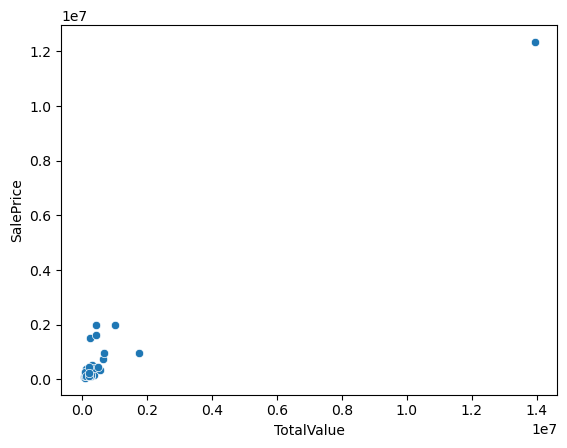

In [284]:
sns.scatterplot(data=Church,x='TotalValue',y='SalePrice')

<Axes: xlabel='BuildingValue', ylabel='SalePrice'>

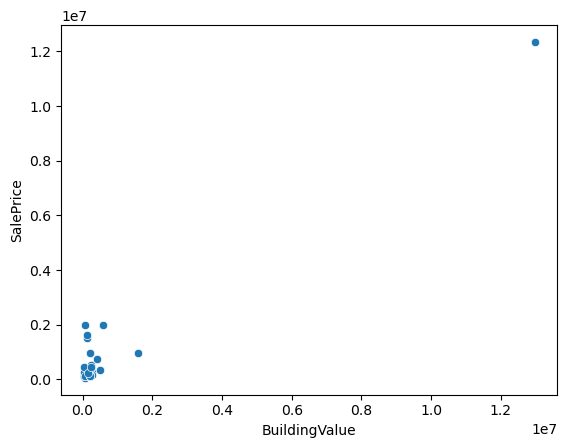

In [285]:
sns.scatterplot(data=Church,x='BuildingValue',y='SalePrice')

### Analysis

There's no any suspicious data in this church category, so gonna keep this data

In [299]:
NH_VRL= (NH['LandUse']=='VACANT RESIDENTIAL LAND')
Vacant_Residential_Land = NH[NH_VRL]
Vacant_Residential_Land.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
60,8903,018 00 0 164.00,VACANT RESIDENTIAL LAND,2013-10-25,25000,No,0.39,24000.0,175900.0,199900.0,2014.0,3.0,2.0,0.0,332 MONCRIEF AVE,GOODLETTSVILLE,2013,2013-Q4
76,22715,018 07 0 062.00,VACANT RESIDENTIAL LAND,2014-10-14,25000,No,0.43,28000.0,207600.0,235600.0,2015.0,3.0,2.0,0.0,507 MATHES CT,GOODLETTSVILLE,2014,2014-Q4
125,2047,018 16 0 136.00,VACANT RESIDENTIAL LAND,2013-04-12,20000,Yes,0.58,26400.0,308300.0,334700.0,2014.0,3.0,2.0,0.0,335 MONCRIEF AVE,GOODLETTSVILLE,2013,2013-Q2
133,43073,025 00 0 218.00,VACANT RESIDENTIAL LAND,2016-01-11,56000,Yes,6.67,148400.0,0.0,148400.0,NaN,NaN,0.0,0.0,DICKERSON PIKE,GOODLETTSVILLE,2016,2016-Q1
134,43074,025 03 0 011.00,VACANT RESIDENTIAL LAND,2016-01-22,50000,Yes,9.89,89000.0,0.0,89000.0,NaN,NaN,NaN,NaN,0 MONCRIEF AVE,GOODLETTSVILLE,2016,2016-Q1


In [287]:
percentile25 = Vacant_Residential_Land['SalePrice'].quantile(0.25)
percentile75 = Vacant_Residential_Land['SalePrice'].quantile(0.75)

In [288]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [289]:
Vacant_Residential_Land [Vacant_Residential_Land['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
711,31108,034 01 0E 001.00,VACANT RESIDENTIAL LAND,2015-05-01,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100 COBBLESTONE PLACE DR,GOODLETTSVILLE,2015,2015-Q2
712,31109,034 01 0E 002.00,VACANT RESIDENTIAL LAND,2015-05-01,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102 COBBLESTONE PLACE DR,GOODLETTSVILLE,2015,2015-Q2
713,31110,034 01 0E 003.00,VACANT RESIDENTIAL LAND,2015-05-01,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104 COBBLESTONE PLACE DR,GOODLETTSVILLE,2015,2015-Q2
714,31111,034 01 0E 004.00,VACANT RESIDENTIAL LAND,2015-05-01,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106 COBBLESTONE PLACE DR,GOODLETTSVILLE,2015,2015-Q2
715,31112,034 01 0E 005.00,VACANT RESIDENTIAL LAND,2015-05-01,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108 COBBLESTONE PLACE DR,GOODLETTSVILLE,2015,2015-Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50544,11285,164 10 0A 468.00,VACANT RESIDENTIAL LAND,2013-12-31,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628 SUMMERBREEZE LN,ANTIOCH,2013,2013-Q4
50547,11286,164 10 0A 469.00,VACANT RESIDENTIAL LAND,2013-12-31,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624 SUMMERBREEZE LN,ANTIOCH,2013,2013-Q4
50550,11287,164 10 0A 470.00,VACANT RESIDENTIAL LAND,2013-12-31,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620 SUMMERBREEZE LN,ANTIOCH,2013,2013-Q4
50552,11288,164 10 0A 471.00,VACANT RESIDENTIAL LAND,2013-12-31,900000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,616 SUMMERBREEZE LN,ANTIOCH,2013,2013-Q4


In [290]:
Vacant_Residential_Land.corr(numeric_only=True)['SalePrice']

UniqueID         0.069173
SalePrice        1.000000
Acreage          0.155281
LandValue        0.320249
BuildingValue    0.034522
TotalValue       0.165267
YearBuilt       -0.093935
Bedrooms         0.395744
FullBath         0.024900
HalfBath         0.035797
SaleYear         0.056526
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

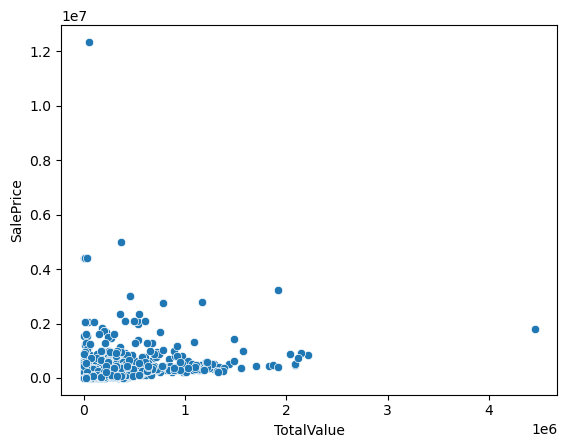

In [291]:
sns.scatterplot(data=Vacant_Residential_Land, x='TotalValue', y='SalePrice')

<Axes: xlabel='Bedrooms', ylabel='SalePrice'>

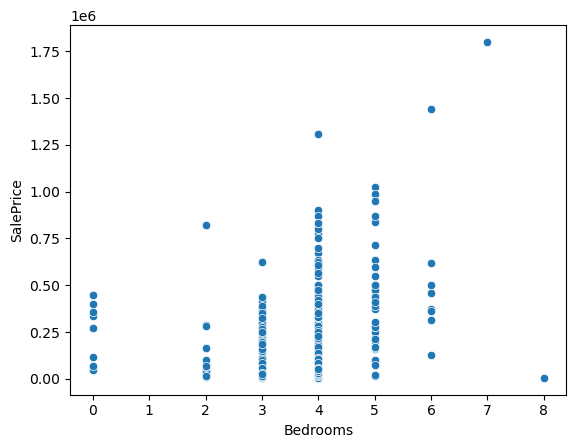

In [292]:
sns.scatterplot(data=Vacant_Residential_Land, x='Bedrooms', y='SalePrice')

In [293]:
drop_idx_VRL=Vacant_Residential_Land[(Vacant_Residential_Land['SalePrice']>10000000)].index

In [294]:
NH = NH.drop(drop_idx_VRL,axis=0)

In [295]:
drop_idx_VRL=Vacant_Residential_Land[(Vacant_Residential_Land['Bedrooms'])==8].index

In [296]:
NH = NH.drop(drop_idx_VRL,axis=0)

In [301]:
drop_idx_VRL=Vacant_Residential_Land[(Vacant_Residential_Land['SalePrice']>4000000)].index

In [302]:
NH = NH.drop(drop_idx_VRL,axis=0)

### Analysis

Based On the scatterplot, we can see there's some of unusual data with low total value and very high Sale Price,and also property that have good feature but (8 rooms) have low sale price, so I think its gonna be a problem in the future analysis so we gonna drop this data out.

In [303]:
NH_ZL= (NH['LandUse']=='ZERO LOT LINE')
Zero_Lot_Line = NH[NH_ZL]
Zero_Lot_Line.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
260,31102,026 06 0 005.00,ZERO LOT LINE,2015-05-29,110000,No,0.14,15000.0,77700.0,92700.0,1985.0,2.0,1.0,1.0,110 HABERSHAM CT,GOODLETTSVILLE,2015,2015-Q2
261,50605,026 06 0 006.00,ZERO LOT LINE,2016-06-30,115000,No,0.23,15000.0,79200.0,94200.0,1985.0,3.0,2.0,0.0,112 HABERSHAM CT,GOODLETTSVILLE,2016,2016-Q2
262,39458,026 06 0 010.00,ZERO LOT LINE,2015-10-21,112300,No,0.11,15000.0,74700.0,89700.0,1985.0,3.0,1.0,1.0,120 HABERSHAM CT,GOODLETTSVILLE,2015,2015-Q4
263,50606,026 06 0 011.00,ZERO LOT LINE,2016-06-09,120000,No,0.13,15000.0,85000.0,100000.0,1986.0,3.0,2.0,0.0,122 HABERSHAM CT,GOODLETTSVILLE,2016,2016-Q2
264,50607,026 06 0 021.00,ZERO LOT LINE,2016-06-07,85000,No,0.08,15000.0,78800.0,93800.0,1985.0,2.0,1.0,1.0,110 BUTLEIGH CT,GOODLETTSVILLE,2016,2016-Q2


In [304]:
percentile25 = Zero_Lot_Line['SalePrice'].quantile(0.25)
percentile75 = Zero_Lot_Line['SalePrice'].quantile(0.75)

In [305]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [306]:
Zero_Lot_Line[Zero_Lot_Line['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
9431,18503,072 10 0 078.00,ZERO LOT LINE,2014-07-30,240000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1034 BURCHWOOD AVE,NASHVILLE,2014,2014-Q3
12324,45981,081 08 0 218.00,ZERO LOT LINE,2016-03-17,248500,No,0.17,40000.0,78300.0,118300.0,1987.0,2.0,1.0,1.0,1803 A 6TH AVE N,NASHVILLE,2016,2016-Q1
12325,47657,081 08 0 219.00,ZERO LOT LINE,2016-04-20,239900,No,0.12,40000.0,78300.0,118300.0,1987.0,2.0,1.0,1.0,1803 B 6TH AVE N,NASHVILLE,2016,2016-Q2
13986,38767,082 09 0 290.00,ZERO LOT LINE,2015-09-09,257000,No,0.10,40000.0,326900.0,369100.0,1899.0,2.0,1.0,0.0,1227 5TH AVE N,NASHVILLE,2015,2015-Q3
13987,51354,082 09 0 290.00,ZERO LOT LINE,2016-06-15,650000,No,0.10,40000.0,326900.0,369100.0,1899.0,2.0,1.0,0.0,1227 5TH AVE N,NASHVILLE,2016,2016-Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42386,3136,145 02 0 075.00,ZERO LOT LINE,2013-05-30,461000,No,0.52,196000.0,161400.0,357400.0,1984.0,4.0,3.0,0.0,1466 TYNE BLVD,NASHVILLE,2013,2013-Q2
46837,24933,159 00 0 205.00,ZERO LOT LINE,2014-12-12,275000,No,0.52,146900.0,145100.0,292000.0,1985.0,2.0,2.0,0.0,1245 OLD HICKORY BLVD,BRENTWOOD,2014,2014-Q4
46841,22576,159 00 0 224.00,ZERO LOT LINE,2014-10-30,275000,No,0.53,146900.0,119600.0,266500.0,1985.0,2.0,3.0,0.0,1243 OLD HICKORY BLVD,BRENTWOOD,2014,2014-Q4
47167,20609,160 14 0 021.00,ZERO LOT LINE,2014-09-15,272000,No,0.24,35600.0,157100.0,192700.0,1986.0,3.0,2.0,1.0,5636 OAKES DR,BRENTWOOD,2014,2014-Q3


In [307]:
Zero_Lot_Line.corr(numeric_only=True)['SalePrice']

UniqueID         0.063082
SalePrice        1.000000
Acreage          0.370764
LandValue        0.793882
BuildingValue    0.736793
TotalValue       0.884348
YearBuilt       -0.113282
Bedrooms         0.152741
FullBath         0.342890
HalfBath         0.002300
SaleYear         0.068081
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

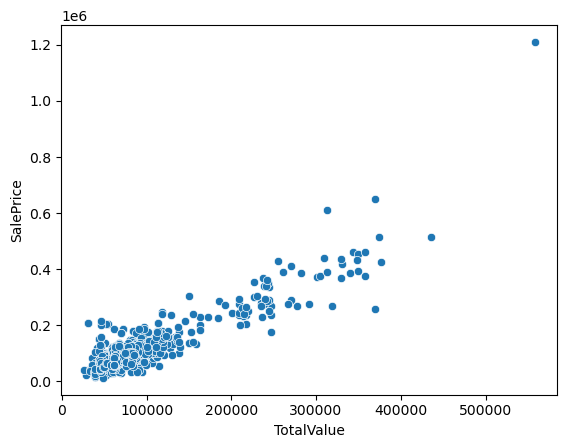

In [308]:
sns.scatterplot(data=Zero_Lot_Line, x='TotalValue', y='SalePrice')

In [309]:
Zero_Lot_Line[(Zero_Lot_Line['SalePrice']>1000000)]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
32601,41647,117 12 0 178.00,ZERO LOT LINE,2015-12-15,1210000,No,0.74,189800.0,313100.0,558200.0,1985.0,3.0,3.0,1.0,1212 GRAYBAR LN,NASHVILLE,2015,2015-Q4


### Analysis
 The data viz of Zero Lot Line column give a glimpse for us that the data have positive correlation ,and there's no suspicious data that indicated as outliers, so we aren't gonna drop any data here.

In [310]:
NH_T= (NH['LandUse']=='TRIPLEX')
Triplex = NH[NH_T]
Triplex.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
2359,9972,044 05 0 115.00,TRIPLEX,2013-11-15,60000,No,0.17,19000.0,53100.0,72100.0,1934.0,3.0,3.0,0.0,303 ENSLEY AVE,OLD HICKORY,2013,2013-Q4
2364,1316,044 05 0 178.00,TRIPLEX,2013-03-25,84400,No,0.16,19000.0,86700.0,105700.0,1930.0,4.0,3.0,0.0,416 RAYON DR,OLD HICKORY,2013,2013-Q1
3254,53190,051 08 0 143.00,TRIPLEX,2016-08-31,225000,No,0.26,16000.0,146900.0,162900.0,1966.0,6.0,6.0,0.0,236 E PALESTINE AVE,MADISON,2016,2016-Q3
4147,49069,053 07 0 004.00,TRIPLEX,2016-05-11,140000,No,0.45,17000.0,126800.0,143800.0,1960.0,4.0,2.0,0.0,1709 GOLF CLUB RD,OLD HICKORY,2016,2016-Q2
4264,40912,053 11 0 011.00,TRIPLEX,2015-11-20,43000,No,0.23,12000.0,36700.0,48700.0,1940.0,5.0,3.0,0.0,140 PARK CIR,OLD HICKORY,2015,2015-Q4


In [311]:
percentile25 = Triplex['SalePrice'].quantile(0.25)
percentile75 = Triplex['SalePrice'].quantile(0.75)

In [312]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [313]:
Triplex[Triplex['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
25859,29046,104 02 0 187.00,TRIPLEX,2015-04-08,1333333,No,0.26,270000.0,0.0,270000.0,NaN,NaN,NaN,NaN,3112 WEST END CIR,NASHVILLE,2015,2015-Q2
25860,29047,104 02 0 188.00,TRIPLEX,2015-04-08,1333333,No,0.24,300000.0,0.0,300000.0,NaN,NaN,NaN,NaN,3114 WEST END CIR,NASHVILLE,2015,2015-Q2
27225,9557,104 15 0 012.00,TRIPLEX,2013-11-12,845000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2511 NATCHEZ TRCE,NASHVILLE,2013,2013-Q4
27766,13066,105 05 0 205.00,TRIPLEX,2014-03-26,850000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1301 WADE AVE,NASHVILLE,2014,2014-Q1
27776,27013,105 05 0 270.00,TRIPLEX,2015-02-11,830000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1106 WADE AVE,NASHVILLE,2015,2015-Q1
35967,40372,129 08 0 084.00,TRIPLEX,2015-11-20,850000,No,0.86,842900.0,0.0,842900.0,NaN,NaN,NaN,NaN,6200 HIGHWAY 100,NASHVILLE,2015,2015-Q4


In [314]:
Triplex.corr(numeric_only=True)['SalePrice']

UniqueID         0.191151
SalePrice        1.000000
Acreage          0.209508
LandValue        0.657136
BuildingValue    0.032847
TotalValue       0.561982
YearBuilt       -0.304805
Bedrooms         0.164392
FullBath         0.004860
HalfBath         0.101924
SaleYear         0.215141
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

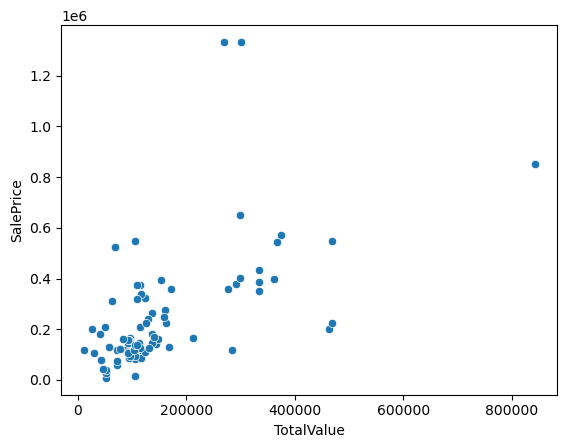

In [315]:
sns.scatterplot(data=Triplex, x='TotalValue', y='SalePrice')

In [316]:
drop_idx_T=Triplex[(Triplex['SalePrice']>1000000)].index

In [317]:
Triplex[(Triplex['SalePrice']>1000000)]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
25859,29046,104 02 0 187.00,TRIPLEX,2015-04-08,1333333,No,0.26,270000.0,0.0,270000.0,NaN,NaN,NaN,NaN,3112 WEST END CIR,NASHVILLE,2015,2015-Q2
25860,29047,104 02 0 188.00,TRIPLEX,2015-04-08,1333333,No,0.24,300000.0,0.0,300000.0,NaN,NaN,NaN,NaN,3114 WEST END CIR,NASHVILLE,2015,2015-Q2


In [318]:
NH = NH.drop(drop_idx_T,axis=0)

### Analysis

Based on the scatter plot, we can see that there's 2 row that have price above 1 million dollar as qutliers, so we gonna drop this row for future analysis

In [328]:
NH_F= (NH['LandUse']=='FOREST')
Forest = NH[NH_F]
Forest

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
5361,31272,061 00 0 055.00,FOREST,2015-05-26,1500000,Yes,35.00,25865.0,0.0,25865.0,NaN,NaN,NaN,NaN,0 HART LN,NASHVILLE,2015,2015-Q2
7347,48684,069 00 0 045.00,FOREST,2016-05-12,225000,No,13.99,6296.0,0.0,6296.0,NaN,NaN,NaN,NaN,0 CURTIS ST,NASHVILLE,2016,2016-Q2
7348,48685,069 00 0 046.00,FOREST,2016-05-12,225000,No,5.66,23097.0,50700.0,89897.0,1997.0,3.0,2.0,0.0,3328 CURTIS ST,NASHVILLE,2016,2016-Q2
7446,48692,069 08 0 003.00,FOREST,2016-05-12,225000,No,11.93,5369.0,0.0,5369.0,NaN,NaN,NaN,NaN,0 LINCOLN AVE,NASHVILLE,2016,2016-Q2
34803,55106,123 00 0 023.00,FOREST,2016-09-28,499900,No,19.87,54966.0,4800.0,63366.0,1920.0,4.0,1.0,0.0,1741 BAKERS GROVE RD,HERMITAGE,2016,2016-Q3
34808,55107,123 00 0 084.00,FOREST,2016-09-28,499900,No,9.95,8880.0,0.0,8880.0,NaN,NaN,NaN,NaN,1755 BAKERS GROVE RD,HERMITAGE,2016,2016-Q3
35321,36445,127 00 0 244.00,FOREST,2015-08-31,1045000,No,21.14,11853.0,0.0,11853.0,NaN,NaN,NaN,NaN,BELLEVUE MANOR DR,NASHVILLE,2015,2015-Q3
46954,52998,160 00 0 179.00,FOREST,2016-08-16,1210000,Yes,19.28,10790.0,0.0,10790.0,NaN,NaN,NaN,NaN,0 FRANKLIN PIKE,NASHVILLE,2016,2016-Q3
50777,18254,169 00 0 049.00,FOREST,2014-07-29,223500,No,22.77,75218.0,35400.0,110618.0,1905.0,2.0,2.0,0.0,8617 HIGHWAY 100,NASHVILLE,2014,2014-Q3


In [320]:
percentile25 = Forest['SalePrice'].quantile(0.25)
percentile75 = Forest['SalePrice'].quantile(0.75)

In [321]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [322]:
Forest[Forest['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
24165,36420,102 00 0 018.00,FOREST,2015-08-06,5200000,Yes,41.24,2772000.0,0.0,2772000.0,NaN,NaN,NaN,NaN,0 CHARLOTTE PIKE,NASHVILLE,2015,2015-Q3


In [323]:
Forest.corr(numeric_only=True)['SalePrice']

UniqueID        -0.228704
SalePrice        1.000000
Acreage          0.806277
LandValue        0.949804
BuildingValue   -0.307188
TotalValue       0.945633
YearBuilt       -0.358208
Bedrooms         0.868372
FullBath        -0.999989
HalfBath              NaN
SaleYear        -0.286051
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

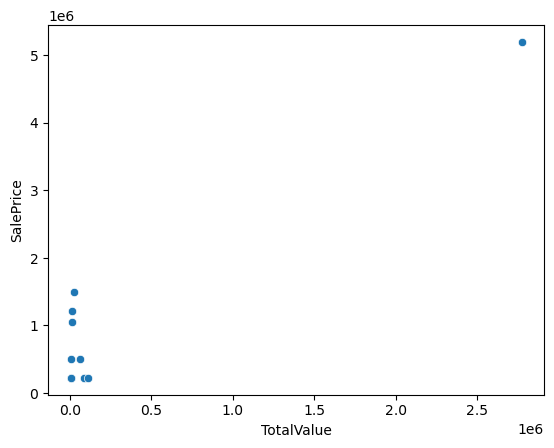

In [324]:
sns.scatterplot(data=Forest, x='TotalValue', y='SalePrice')

<Axes: xlabel='LandValue', ylabel='SalePrice'>

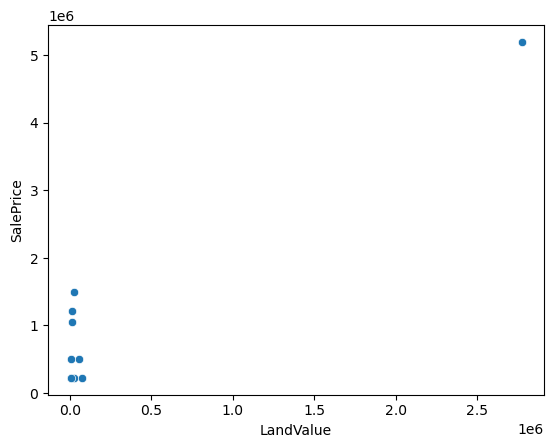

In [325]:
sns.scatterplot(data=Forest, x='LandValue', y='SalePrice')

In [326]:
drop_idx_F= Forest[(Forest['SalePrice'])>5000000].index

In [327]:
NH = NH.drop(drop_idx_F,axis=0)

<Axes: xlabel='LandValue', ylabel='SalePrice'>

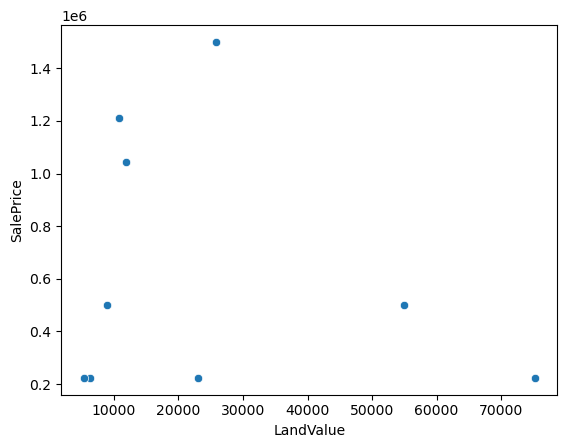

In [329]:
sns.scatterplot(data=Forest, x='LandValue', y='SalePrice')

### Analysis

For the analysis in Forest Column , We can see there's a suspicious data that look have unrealistic sale price , so we gonna drop this row for better analysis in the future.

In [330]:
NH_Do= (NH['LandUse']=='DORMITORY/BOARDING HOUSE')
Dorm = NH[NH_Do]
Dorm.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
6188,56154,061 16 0 324.00,DORMITORY/BOARDING HOUSE,2016-10-27,300000,No,0.41,40000.0,112600.0,152600.0,1930.0,4.0,2.0,0.0,1415 MCALPINE AVE,NASHVILLE,2016,2016-Q4
8632,31326,072 02 0 016.00,DORMITORY/BOARDING HOUSE,2015-05-11,253000,No,0.21,33600.0,113300.0,146900.0,1938.0,4.0,2.0,0.0,1005 IVERSON AVE,NASHVILLE,2015,2015-Q2
8961,56181,072 06 0 196.00,DORMITORY/BOARDING HOUSE,2016-10-07,215000,No,0.16,18200.0,84000.0,102200.0,1930.0,5.0,2.0,0.0,1070 ZOPHI ST,NASHVILLE,2016,2016-Q4
9855,33222,072 13 0 027.00,DORMITORY/BOARDING HOUSE,2015-06-01,135000,No,0.18,30000.0,200400.0,230400.0,1933.0,4.0,2.0,1.0,928 CAHAL AVE,NASHVILLE,2015,2015-Q2
9856,42079,072 13 0 027.00,DORMITORY/BOARDING HOUSE,2015-12-14,340000,No,0.18,30000.0,200400.0,230400.0,1933.0,4.0,2.0,1.0,928 CAHAL AVE,NASHVILLE,2015,2015-Q4


In [331]:
percentile25 = Dorm['SalePrice'].quantile(0.25)
percentile75 = Dorm['SalePrice'].quantile(0.75)

In [332]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [333]:
Dorm[Dorm['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
13930,56240,082 08 0 300.00,DORMITORY/BOARDING HOUSE,2016-10-13,613000,No,0.17,78000.0,257600.0,335600.0,1910.0,6.0,3.0,0.0,913 CHICAMAUGA AVE,NASHVILLE,2016,2016-Q4


In [334]:
Dorm.corr(numeric_only=True)['SalePrice']

UniqueID         0.341789
SalePrice        1.000000
Acreage         -0.196595
LandValue        0.463648
BuildingValue    0.311149
TotalValue       0.347743
YearBuilt        0.035979
Bedrooms         0.403324
FullBath         0.244604
HalfBath        -0.098268
SaleYear         0.272097
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

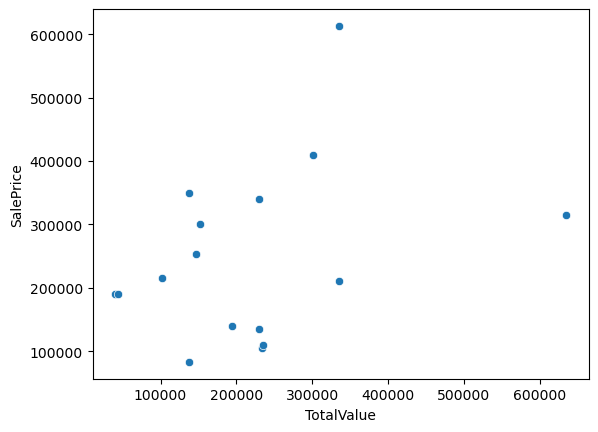

In [335]:
sns.scatterplot(data=Dorm, x='TotalValue', y='SalePrice')

<Axes: xlabel='LandValue', ylabel='SalePrice'>

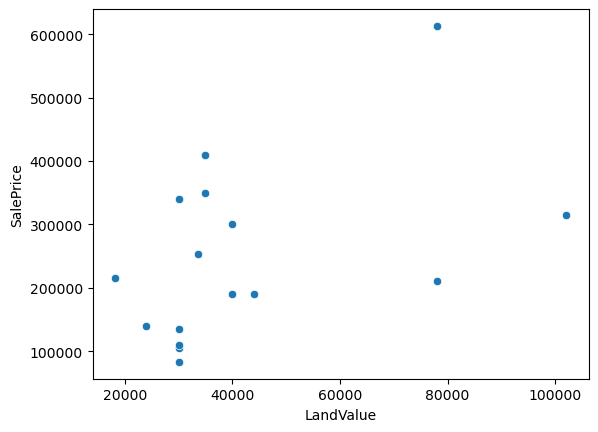

In [124]:
sns.scatterplot(data=Dorm, x='LandValue', y='SalePrice')

### Analysis

In this data viz, we can see the outliers still in the positif correlation and not indicated any abnormality in margin of sale price, so we aren't gonna drop this data.

In [336]:
NH_VCL= (NH['LandUse']=='VACANT COMMERCIAL LAND')
Vacant_Commercial_Land = NH[NH_VCL]
Vacant_Commercial_Land

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
13969,28705,082 09 0 067.00,VACANT COMMERCIAL LAND,2015-03-30,550000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1311 5TH AVE N,NASHVILLE,2015,2015-Q1
13970,28706,082 09 0 068.00,VACANT COMMERCIAL LAND,2015-03-30,550000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1313 5TH AVE N,NASHVILLE,2015,2015-Q1
13971,7463,082 09 0 072.00,VACANT COMMERCIAL LAND,2013-08-29,925000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1321 5TH AVE N,NASHVILLE,2013,2013-Q3
13972,7464,082 09 0 073.00,VACANT COMMERCIAL LAND,2013-08-29,925000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1323 5TH AVE N,NASHVILLE,2013,2013-Q3
13973,7465,082 09 0 074.00,VACANT COMMERCIAL LAND,2013-08-29,925000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1325 5TH AVE N,NASHVILLE,2013,2013-Q3
13974,7466,082 09 0 075.00,VACANT COMMERCIAL LAND,2013-08-29,925000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1327 5TH AVE N,NASHVILLE,2013,2013-Q3
13988,14920,082 09 0 292.00,VACANT COMMERCIAL LAND,2014-04-30,275000,Yes,0.19,40000.0,0.0,40000.0,NaN,NaN,NaN,NaN,1235 5TH AVE N,NASHVILLE,2014,2014-Q2
14610,18569,082 16 0 223.00,VACANT COMMERCIAL LAND,2014-07-30,250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600 FATHERLAND ST,NASHVILLE,2014,2014-Q3
15500,18590,083 06 0 420.00,VACANT COMMERCIAL LAND,2014-07-28,900000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704 PORTER RD,NASHVILLE,2014,2014-Q3
18193,3190,091 02 0 177.00,VACANT COMMERCIAL LAND,2013-05-31,325000,No,0.20,25000.0,0.0,25000.0,NaN,NaN,NaN,NaN,6014 NEW YORK AVE,NASHVILLE,2013,2013-Q2


In [337]:
percentile25 = Vacant_Commercial_Land['SalePrice'].quantile(0.25)
percentile75 = Vacant_Commercial_Land['SalePrice'].quantile(0.75)

In [338]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [339]:
Vacant_Commercial_Land[Vacant_Commercial_Land['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter


In [340]:
Vacant_Commercial_Land.corr(numeric_only=True)['SalePrice']

UniqueID         0.111901
SalePrice        1.000000
Acreage         -0.481822
LandValue       -0.544375
BuildingValue         NaN
TotalValue      -0.544375
YearBuilt             NaN
Bedrooms              NaN
FullBath              NaN
HalfBath              NaN
SaleYear         0.078048
Name: SalePrice, dtype: float64

### Analysis

In this category, actually we found a suspicious data like similar Sale Price in the same date and abnormal value, but we can't drop this data because we lack of evidence, so we gonna keep this row for future analysis.

In [341]:
NH_CO= (NH['LandUse']=='CONDOMINIUM OFC  OR OTHER COM CONDO')
Condo_Ofc = NH[NH_CO]
Condo_Ofc

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
14053,56621,082 09 0P 103.00,CONDOMINIUM OFC OR OTHER COM CONDO,2016-10-04,232000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500 MADISON ST,NASHVILLE,2016,2016-Q4
14059,18966,082 09 0Q 001.00,CONDOMINIUM OFC OR OTHER COM CONDO,2014-07-15,435000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371 MONROE ST,NASHVILLE,2014,2014-Q3
14060,53726,082 09 0Q 001.00,CONDOMINIUM OFC OR OTHER COM CONDO,2016-08-15,735000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371 MONROE ST,NASHVILLE,2016,2016-Q3
14412,35562,082 13 0G 101.00,CONDOMINIUM OFC OR OTHER COM CONDO,2015-07-01,340000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345 HARRISON ST,NASHVILLE,2015,2015-Q3
14577,21494,082 15 0A 128.00,CONDOMINIUM OFC OR OTHER COM CONDO,2014-09-12,650000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501 MAIN ST,NASHVILLE,2014,2014-Q3
14578,3396,082 15 0A 129.00,CONDOMINIUM OFC OR OTHER COM CONDO,2013-05-01,147200,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2115 YEAMAN PL,NASHVILLE,2013,2013-Q2
14579,3397,082 15 0A 130.00,CONDOMINIUM OFC OR OTHER COM CONDO,2013-05-01,147200,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505 MAIN ST,NASHVILLE,2013,2013-Q2
20954,31966,093 06 1F 002.00,CONDOMINIUM OFC OR OTHER COM CONDO,2015-05-22,175000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4TH AVE N,NASHVILLE,2015,2015-Q2
20955,37207,093 06 1F 002.00,CONDOMINIUM OFC OR OTHER COM CONDO,2015-08-13,175000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4TH AVE N,NASHVILLE,2015,2015-Q3
20958,31968,093 06 1F 100.00,CONDOMINIUM OFC OR OTHER COM CONDO,2015-05-22,175000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162 4TH AVE N,NASHVILLE,2015,2015-Q2


In [342]:
percentile25 = Condo_Ofc['SalePrice'].quantile(0.25)
percentile75 = Condo_Ofc['SalePrice'].quantile(0.75)

In [343]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [344]:
Condo_Ofc[Condo_Ofc['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
51996,41415,172 12 0D 555.00,CONDOMINIUM OFC OR OTHER COM CONDO,2015-12-21,4000000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6901 LENOX VILLAGE DR,NASHVILLE,2015,2015-Q4


In [345]:
Condo_Ofc.corr(numeric_only=True)['SalePrice']

UniqueID         0.181665
SalePrice        1.000000
Acreage               NaN
LandValue             NaN
BuildingValue         NaN
TotalValue            NaN
YearBuilt             NaN
Bedrooms              NaN
FullBath              NaN
HalfBath              NaN
SaleYear         0.093120
Name: SalePrice, dtype: float64

### Analysis

In this category there's lack of data but they only have 1 rows of outliers so its gonna have minor effect on the whole analysis, we gonna keep this data for future analysis.

In [346]:
NH_Cd= (NH['LandUse']=='CONDO') 
Condo = NH[NH_Cd]
Condo

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
3215,15557,051 06 0A 002.00,CONDO,2014-05-15,82000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724 DUE WEST AVE N,MADISON,2014,2014-Q2
3723,7060,052 09 0B 008.00,CONDO,2013-08-12,72000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428 B E PALESTINE AVE,MADISON,2013,2013-Q3
9347,15662,072 09 0A 004.00,CONDO,2014-05-23,163000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2715 B GEAR ST,NASHVILLE,2014,2014-Q2
11257,8167,075 08 0A 096.00,CONDO,2013-09-30,70000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189 BROOKE CASTLE DR,HERMITAGE,2013,2013-Q3
11261,8170,075 08 0A 103.00,CONDO,2013-09-30,70000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204 BROOKE CASTLE DR,HERMITAGE,2013,2013-Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,12870,162 09 0D 008.00,CONDO,2014-03-14,135000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015 PINECREST DR,NASHVILLE,2014,2014-Q1
50786,9419,171 02 0A 003.00,CONDO,2013-11-22,195000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105 VILLA VIEW CT,BRENTWOOD,2013,2013-Q4
50787,11405,171 02 0A 008.00,CONDO,2014-01-22,165000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115 VILLA VIEW CT,BRENTWOOD,2014,2014-Q1
54759,3940,181 02 0A 232.00,CONDO,2013-06-11,147500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8121 LENOX CREEKSIDE DR,ANTIOCH,2013,2013-Q2


In [347]:
percentile25 = Condo['SalePrice'].quantile(0.25)
percentile75 = Condo['SalePrice'].quantile(0.75)

In [348]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [349]:
Condo[Condo['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter


In [350]:
Condo.sort_values(by=['SalePrice'],ascending=False).head(60)

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
44515,14847,149 08 0A 212.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212 DAVENPORT DR,NASHVILLE,2014,2014-Q2
44490,14822,149 08 0A 110.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110 DAVENPORT DR,NASHVILLE,2014,2014-Q2
44488,14820,149 08 0A 108.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108 DAVENPORT DR,NASHVILLE,2014,2014-Q2
44487,14819,149 08 0A 107.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107 DAVENPORT DR,NASHVILLE,2014,2014-Q2
44486,14818,149 08 0A 106.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106 DAVENPORT DR,NASHVILLE,2014,2014-Q2
44485,14817,149 08 0A 105.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105 DAVENPORT DR,NASHVILLE,2014,2014-Q2
44484,14816,149 08 0A 104.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104 DAVENPORT DR,NASHVILLE,2014,2014-Q2
44483,14815,149 08 0A 103.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103 DAVENPORT DR,NASHVILLE,2014,2014-Q2
44481,14813,149 08 0A 101.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101 DAVENPORT DR,NASHVILLE,2014,2014-Q2
44517,14849,149 08 0A 214.00,CONDO,2014-04-10,4250000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214 DAVENPORT DR,NASHVILLE,2014,2014-Q2


In [351]:
Condo.corr(numeric_only=True)['SalePrice']

UniqueID         0.622996
SalePrice        1.000000
Acreage               NaN
LandValue             NaN
BuildingValue         NaN
TotalValue            NaN
YearBuilt             NaN
Bedrooms              NaN
FullBath              NaN
HalfBath              NaN
SaleYear         0.630973
Name: SalePrice, dtype: float64

### Analysis

This category lack of data too, so its gonna be wise for us to not drop any row of data in this category eventhough there's 57 suspicious row,but for now we gonna keep this out.

In [352]:
NH_GB= (NH['LandUse']=='GREENBELT') 
GreenBelt = NH[NH_GB]
GreenBelt.sort_values(by=['SalePrice'],ascending=False)

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
30206,51699,114 00 0 208.00,GREENBELT,2016-07-08,3625000,No,27.82,167919.0,83300.0,253119.0,1966.0,3.0,1.0,1.0,7315 SONYA DR,NASHVILLE,2016,2016-Q3
34816,20292,124 00 0 070.00,GREENBELT,2014-08-07,780000,No,35.97,86370.0,617000.0,824070.0,1989.0,5.0,5.0,0.0,3365 HOBSON PIKE,HERMITAGE,2014,2014-Q3
1713,50922,043 00 0 016.00,GREENBELT,2016-06-24,499900,No,47.50,99195.0,32100.0,149495.0,1918.0,2.0,1.0,0.0,144 SCENIC VIEW RD,OLD HICKORY,2016,2016-Q2
1714,50923,043 00 0 017.00,GREENBELT,2016-06-24,499900,No,1.28,2195.0,0.0,2195.0,NaN,NaN,NaN,NaN,142 SCENIC VIEW RD,OLD HICKORY,2016,2016-Q2
6469,10836,063 00 0 060.00,GREENBELT,2013-12-27,309535,No,7.46,9933.0,0.0,9933.0,NaN,NaN,NaN,NaN,1833 HUDSON RD,MADISON,2013,2013-Q4
6470,10837,063 00 0 061.00,GREENBELT,2013-12-27,309535,No,7.70,11024.0,0.0,75024.0,NaN,NaN,NaN,NaN,1829 HUDSON RD,MADISON,2013,2013-Q4
6471,10838,063 00 0 062.00,GREENBELT,2013-12-27,309535,No,7.75,12819.0,0.0,12819.0,NaN,NaN,NaN,NaN,1823 HUDSON RD,MADISON,2013,2013-Q4
48438,8406,162 00 0 049.00,GREENBELT,2013-10-30,193890,No,16.17,45824.0,50100.0,111424.0,1925.0,4.0,1.0,0.0,208 BENZING RD,ANTIOCH,2013,2013-Q4
48439,8407,162 00 0 227.00,GREENBELT,2013-10-30,193890,No,4.61,6818.0,0.0,6818.0,NaN,NaN,NaN,NaN,0 BENZING RD,ANTIOCH,2013,2013-Q4
23700,31681,098 00 0 049.00,GREENBELT,2015-05-20,150000,No,9.88,113100.0,0.0,113400.0,NaN,NaN,NaN,NaN,5328 JOHN HAGAR RD,MOUNT JULIET,2015,2015-Q2


In [353]:
percentile25 = GreenBelt['SalePrice'].quantile(0.25)
percentile75 = GreenBelt['SalePrice'].quantile(0.75)

In [354]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [355]:
GreenBelt[GreenBelt['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
30206,51699,114 00 0 208.00,GREENBELT,2016-07-08,3625000,No,27.82,167919.0,83300.0,253119.0,1966.0,3.0,1.0,1.0,7315 SONYA DR,NASHVILLE,2016,2016-Q3


In [356]:
GreenBelt.corr(numeric_only=True)['SalePrice']

UniqueID         0.507284
SalePrice        1.000000
Acreage          0.135834
LandValue        0.642353
BuildingValue    0.175417
TotalValue       0.287309
YearBuilt        0.475303
Bedrooms        -0.123153
FullBath        -0.098796
HalfBath         0.983271
SaleYear         0.422066
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

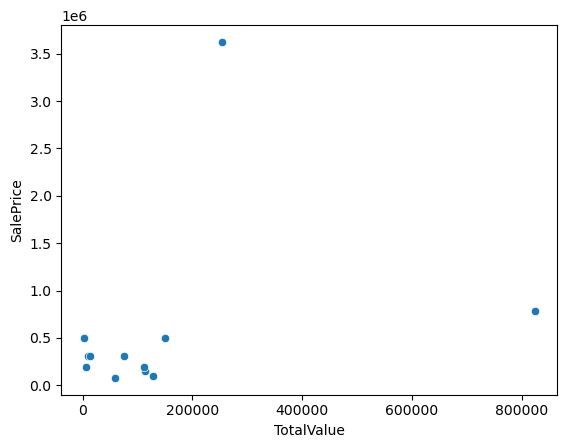

In [357]:
sns.scatterplot(data=GreenBelt, x='TotalValue', y='SalePrice')

In [358]:
GreenBelt[(GreenBelt['TotalValue']>200000) & (GreenBelt['SalePrice']>1000000)]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
30206,51699,114 00 0 208.00,GREENBELT,2016-07-08,3625000,No,27.82,167919.0,83300.0,253119.0,1966.0,3.0,1.0,1.0,7315 SONYA DR,NASHVILLE,2016,2016-Q3


In [359]:
drop_idx_GB = GreenBelt[(GreenBelt['TotalValue']>200000) & (GreenBelt['SalePrice']>1000000)].index

In [360]:
NH = NH.drop(drop_idx_GB,axis=0)

### Analysis

There's a suspicious margin of data where a greenbelt can have 3 million dollar margin in Nashville, so we gonna drop this data 

In [361]:
NH_Qd= (NH['LandUse']=='QUADPLEX') 
Quadplex = NH[NH_Qd]
Quadplex

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
3257,14463,051 08 0 199.00,QUADPLEX,2014-04-04,250000,No,0.22,16000.0,97900.0,113900.0,1981.0,4.0,4.0,0.0,340 E WEBSTER ST,MADISON,2014,2014-Q2
3258,54668,051 08 0 200.00,QUADPLEX,2016-09-21,130000,No,0.36,16000.0,97900.0,113900.0,1981.0,4.0,4.0,0.0,332 E WEBSTER ST,MADISON,2016,2016-Q3
3415,33106,052 01 0 200.00,QUADPLEX,2015-06-29,137000,No,0.48,16000.0,161600.0,177600.0,1960.0,6.0,2.0,0.0,257 MADISON BLVD,MADISON,2015,2015-Q2
8075,31306,071 11 0 191.00,QUADPLEX,2015-05-29,170000,No,0.18,15000.0,95700.0,110700.0,1930.0,7.0,4.0,0.0,313 GATEWOOD AVE,NASHVILLE,2015,2015-Q2
8139,31310,071 12 0 076.00,QUADPLEX,2015-05-29,180000,No,0.57,18000.0,122700.0,140700.0,1919.0,3.0,4.0,0.0,1601 JONES AVE,NASHVILLE,2015,2015-Q2
12654,13262,081 11 0 272.00,QUADPLEX,2014-03-31,50000,No,0.22,13000.0,51600.0,64600.0,1950.0,4.0,4.0,0.0,1630 17TH AVE N,NASHVILLE,2014,2014-Q1
12662,29356,081 11 0 325.00,QUADPLEX,2015-04-30,152000,No,0.26,13000.0,77500.0,90500.0,1969.0,8.0,4.0,0.0,1714 16TH AVE N,NASHVILLE,2015,2015-Q2
12717,50425,081 11 0 530.00,QUADPLEX,2016-06-28,225000,No,0.22,13000.0,81100.0,94100.0,1960.0,8.0,4.0,0.0,1619 12TH AVE N,NASHVILLE,2016,2016-Q2
13077,22595,081 14 0 046.00,QUADPLEX,2014-10-22,70000,No,0.17,13000.0,102800.0,115800.0,1930.0,4.0,4.0,0.0,2412 SCOVEL ST,NASHVILLE,2014,2014-Q4
13176,3177,081 15 0 362.00,QUADPLEX,2013-05-23,230000,No,0.26,13000.0,134400.0,147400.0,1973.0,8.0,4.0,0.0,1725 KNOWLES ST,NASHVILLE,2013,2013-Q2


In [362]:
percentile25 = Quadplex['SalePrice'].quantile(0.25)
percentile75 = Quadplex['SalePrice'].quantile(0.75)

In [363]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [364]:
Quadplex[Quadplex['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
26941,27798,104 11 0Y 002.00,QUADPLEX,2015-03-17,2665500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003 CONVENT PL,NASHVILLE,2015,2015-Q1


In [365]:
Quadplex.corr(numeric_only=True)['SalePrice']

UniqueID         0.140233
SalePrice        1.000000
Acreage         -0.099242
LandValue        0.522420
BuildingValue    0.111880
TotalValue       0.453101
YearBuilt       -0.214232
Bedrooms         0.089185
FullBath         0.018905
HalfBath        -0.028835
SaleYear         0.224589
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

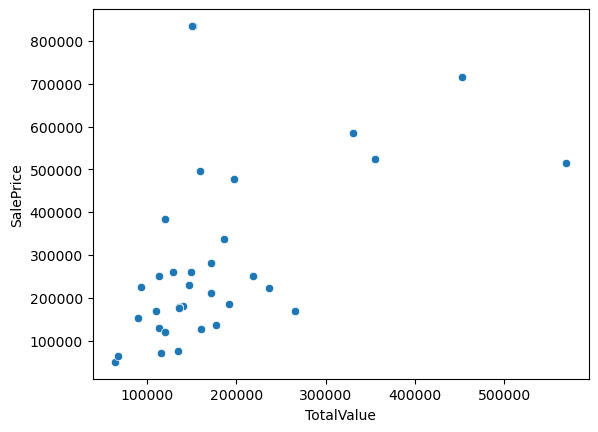

In [366]:
sns.scatterplot(data=Quadplex, x='TotalValue', y='SalePrice')

In [367]:
Quadplex[(Quadplex['SalePrice']>1000000)]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
26941,27798,104 11 0Y 002.00,QUADPLEX,2015-03-17,2665500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003 CONVENT PL,NASHVILLE,2015,2015-Q1


In [368]:
drop_idx_Qd = Quadplex[(Quadplex['SalePrice']>1000000)].index

In [369]:
NH = NH.drop(drop_idx_Qd,axis=0)

### Analysis

Based on this data, we can say this data have abnormal data that indicated as outliers, so we gonna drop this data for better analysis

In [159]:
NH_PL= (NH['LandUse']=='PARKING LOT') 
Parking_Lot = NH[NH_PL]
Parking_Lot

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
2087,12419,043 13 0 164.00,PARKING LOT,2014-02-17,275000,No,0.10,1500.0,0.0,5100.0,NaN,NaN,NaN,NaN,202 MAPLE ST,MADISON,2014,2014-Q1
2315,19863,043 16 0 027.00,PARKING LOT,2014-08-13,150000,No,0.44,18000.0,0.0,40200.0,NaN,NaN,NaN,NaN,104 EAGAN CIR,MADISON,2014,2014-Q3
2317,19865,043 16 0 029.00,PARKING LOT,2014-08-13,150000,No,0.06,3000.0,0.0,5600.0,NaN,NaN,NaN,NaN,122 EAGAN CIR,MADISON,2014,2014-Q3
10301,25198,072 15 0 243.00,PARKING LOT,2014-12-16,750000,No,0.16,25000.0,0.0,32200.0,NaN,NaN,NaN,NaN,1609 PORTER RD,NASHVILLE,2014,2014-Q4
10303,25200,072 15 0 245.00,PARKING LOT,2014-12-16,750000,No,0.39,169900.0,0.0,187200.0,NaN,NaN,NaN,NaN,1528 RIVERSIDE DR,NASHVILLE,2014,2014-Q4
10306,25201,072 15 0 249.00,PARKING LOT,2014-12-16,750000,No,0.25,25000.0,0.0,36800.0,NaN,NaN,NaN,NaN,1528 B RIVERSIDE DR,NASHVILLE,2014,2014-Q4
10307,13485,072 15 0 250.00,PARKING LOT,2014-03-13,98700,No,0.19,25000.0,0.0,36800.0,NaN,NaN,NaN,NaN,1528 C RIVERSIDE DR,NASHVILLE,2014,2014-Q1
15146,35057,083 04 0 120.01,PARKING LOT,2015-07-27,325000,No,0.12,23500.0,0.0,27200.0,NaN,NaN,NaN,NaN,1210 PRESTON DR,NASHVILLE,2015,2015-Q3
27663,35706,105 03 0 116.00,PARKING LOT,2015-08-07,130000,No,0.13,18000.0,0.0,18000.0,NaN,NaN,NaN,NaN,1116 2ND AVE S,NASHVILLE,2015,2015-Q3
32896,11565,117 16 0 159.01,PARKING LOT,2014-01-16,600000,Yes,0.97,437500.0,0.0,482900.0,NaN,NaN,NaN,NaN,3846 GRANNY WHITE PIKE,NASHVILLE,2014,2014-Q1


In [160]:
percentile25 = Parking_Lot['SalePrice'].quantile(0.25)
percentile75 = Parking_Lot['SalePrice'].quantile(0.75)

In [370]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [371]:
Parking_Lot[Parking_Lot['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
38368,19028,133 02 0 031.00,PARKING LOT,2014-08-08,9500000,No,0.73,104000.0,0.0,127700.0,NaN,NaN,NaN,NaN,301 SUNRISE AVE,NASHVILLE,2014,2014-Q3


In [372]:
Parking_Lot.corr(numeric_only=True)['SalePrice']

UniqueID        -0.114795
SalePrice        1.000000
Acreage          0.492329
LandValue        0.108815
BuildingValue         NaN
TotalValue       0.126409
YearBuilt             NaN
Bedrooms              NaN
FullBath              NaN
HalfBath              NaN
SaleYear        -0.178914
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

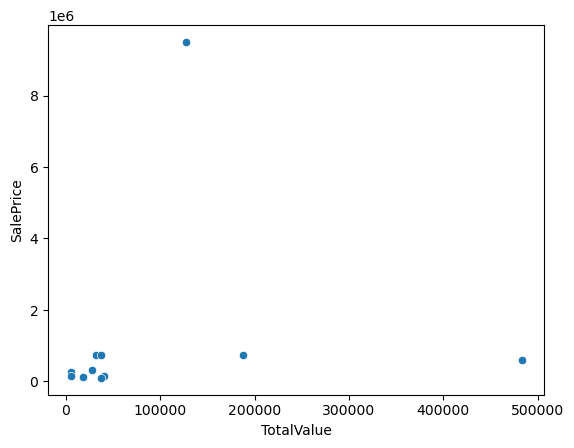

In [373]:
sns.scatterplot(data=Parking_Lot, x='TotalValue', y='SalePrice')

In [374]:
Parking_Lot[(Parking_Lot['TotalValue']>100000) & (Parking_Lot['SalePrice']>8000000)]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
38368,19028,133 02 0 031.00,PARKING LOT,2014-08-08,9500000,No,0.73,104000.0,0.0,127700.0,NaN,NaN,NaN,NaN,301 SUNRISE AVE,NASHVILLE,2014,2014-Q3


In [375]:
drop_idx_PL=Parking_Lot[(Parking_Lot['TotalValue']>100000) & (Parking_Lot['SalePrice']>8000000)].index

In [376]:
NH = NH.drop(drop_idx_PL,axis=0)

### Analysis

Based on this data, I can say that they have suspicious data that have abnormal margin, so I think its gonna be wise to drop this data .

In [377]:
NH_RC= (NH['LandUse']=='RESIDENTIAL COMBO/MISC') 
Residential_Combo= NH[NH_RC]
Residential_Combo

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
1195,40670,041 00 0 030.01,RESIDENTIAL COMBO/MISC,2015-11-06,49500,Yes,1.46,48500.0,0.0,48500.0,NaN,NaN,NaN,NaN,0 CREEK TRAIL DR,WHITES CREEK,2015,2015-Q4
1834,18416,043 05 0 190.00,RESIDENTIAL COMBO/MISC,2014-07-22,135000,No,0.18,18000.0,0.0,19200.0,NaN,NaN,NaN,NaN,302 GARNER AVE,MADISON,2014,2014-Q3
2615,47302,044 15 0 421.00,RESIDENTIAL COMBO/MISC,2016-04-15,145000,No,0.29,105000.0,0.0,106200.0,NaN,NaN,NaN,NaN,1005 RIVERSIDE RD,OLD HICKORY,2016,2016-Q2
3211,677,051 04 0 147.00,RESIDENTIAL COMBO/MISC,2013-02-12,75000,No,0.22,16000.0,0.0,48100.0,NaN,NaN,NaN,NaN,837 E MEADE AVE,MADISON,2013,2013-Q1
3378,23945,052 00 0 020.00,RESIDENTIAL COMBO/MISC,2014-11-17,100000,No,3.10,58000.0,178700.0,239700.0,1975.0,3.0,2.0,0.0,1133 NEELYS BEND RD,MADISON,2014,2014-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38291,16060,133 01 0 111.00,RESIDENTIAL COMBO/MISC,2014-06-27,155000,No,0.18,16000.0,0.0,16000.0,NaN,NaN,NaN,NaN,410 PATTERSON ST,NASHVILLE,2014,2014-Q2
39185,55108,135 00 0 164.00,RESIDENTIAL COMBO/MISC,2016-09-09,330000,No,19.49,241100.0,0.0,242000.0,NaN,NaN,NaN,NaN,2152 SMITH SPRINGS RD,NASHVILLE,2016,2016-Q3
39195,24208,135 00 0 297.00,RESIDENTIAL COMBO/MISC,2014-11-18,65100,Yes,3.00,60000.0,0.0,61100.0,NaN,NaN,NaN,NaN,0 UNA RECREATION RD,NASHVILLE,2014,2014-Q4
42235,7908,144 00 0 018.01,RESIDENTIAL COMBO/MISC,2013-09-20,385000,No,1.86,315000.0,499700.0,815800.0,2014.0,4.0,3.0,1.0,2063 TIMBERWOOD DR,NASHVILLE,2013,2013-Q3


In [378]:
percentile25 = Residential_Combo['SalePrice'].quantile(0.25)
percentile75 = Residential_Combo['SalePrice'].quantile(0.75)

In [379]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [380]:
Residential_Combo[Residential_Combo['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
7521,40639,070 06 0 043.00,RESIDENTIAL COMBO/MISC,2015-11-19,2040000,No,1.47,29700.0,0.0,47200.0,NaN,NaN,NaN,NaN,1118 W TRINITY LN,NASHVILLE,2015,2015-Q4
19580,41524,091 14 0 239.00,RESIDENTIAL COMBO/MISC,2015-12-04,750000,No,0.79,168000.0,85100.0,253100.0,1930.0,4.0,2.0,0.0,321 A 54TH AVE N,NASHVILLE,2015,2015-Q4
25858,34250,104 02 0 177.00,RESIDENTIAL COMBO/MISC,2015-07-24,1000000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3101 BELWOOD ST,NASHVILLE,2015,2015-Q3
26694,42782,104 10 0 036.00,RESIDENTIAL COMBO/MISC,2016-01-07,750000,No,0.41,185000.0,274100.0,460600.0,1940.0,2.0,3.0,0.0,208 ELMINGTON AVE,NASHVILLE,2016,2016-Q1
26844,34275,104 11 0 049.00,RESIDENTIAL COMBO/MISC,2015-07-24,1000000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2116 ACKLEN AVE,NASHVILLE,2015,2015-Q3
26860,37670,104 11 0 185.00,RESIDENTIAL COMBO/MISC,2015-09-22,3625000,No,0.42,253500.0,490100.0,743600.0,1930.0,6.0,2.0,0.0,1907 CONVENT PL,NASHVILLE,2015,2015-Q3
27299,44909,104 15 0 332.00,RESIDENTIAL COMBO/MISC,2016-03-31,985000,No,0.21,214500.0,498800.0,713300.0,1929.0,4.0,4.0,1.0,2111 W LINDEN AVE,NASHVILLE,2016,2016-Q1
28364,37250,105 11 0 310.00,RESIDENTIAL COMBO/MISC,2015-09-14,2040850,No,0.60,117000.0,0.0,128400.0,NaN,NaN,NaN,NaN,1608 PILLOW ST,NASHVILLE,2015,2015-Q3
36537,37824,130 07 0 146.00,RESIDENTIAL COMBO/MISC,2015-09-30,3325000,No,1.50,953400.0,0.0,983900.0,NaN,NaN,NaN,NaN,0 WESTVIEW AVE,NASHVILLE,2015,2015-Q3
37267,11592,131 04 0 118.00,RESIDENTIAL COMBO/MISC,2014-01-13,725000,No,0.19,152000.0,532000.0,704900.0,2013.0,5.0,4.0,0.0,1112 WOODVALE DR,NASHVILLE,2014,2014-Q1


In [381]:
Residential_Combo.corr(numeric_only=True)['SalePrice']

UniqueID         0.193983
SalePrice        1.000000
Acreage          0.025164
LandValue        0.673258
BuildingValue    0.131390
TotalValue       0.492655
YearBuilt       -0.324636
Bedrooms         0.462216
FullBath         0.035548
HalfBath        -0.161140
SaleYear         0.167412
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

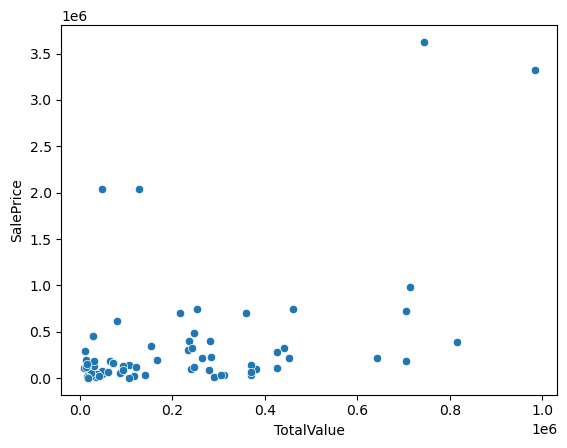

In [382]:
sns.scatterplot(data=Residential_Combo, x='TotalValue', y='SalePrice')

<Axes: xlabel='LandValue', ylabel='SalePrice'>

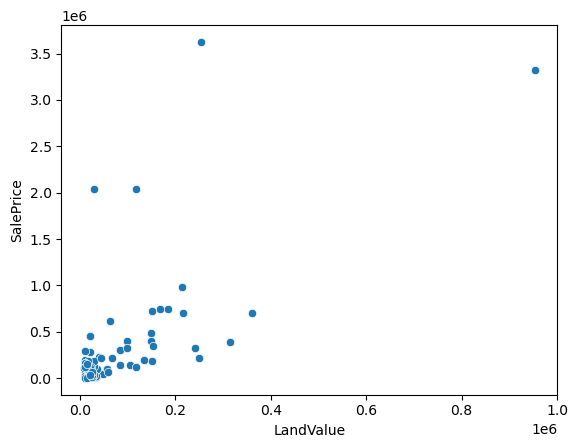

In [174]:
sns.scatterplot(data=Residential_Combo, x='LandValue', y='SalePrice')

In [383]:
Residential_Combo[(Residential_Combo['SalePrice']>1500000)]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
7521,40639,070 06 0 043.00,RESIDENTIAL COMBO/MISC,2015-11-19,2040000,No,1.47,29700.0,0.0,47200.0,NaN,NaN,NaN,NaN,1118 W TRINITY LN,NASHVILLE,2015,2015-Q4
26860,37670,104 11 0 185.00,RESIDENTIAL COMBO/MISC,2015-09-22,3625000,No,0.42,253500.0,490100.0,743600.0,1930.0,6.0,2.0,0.0,1907 CONVENT PL,NASHVILLE,2015,2015-Q3
28364,37250,105 11 0 310.00,RESIDENTIAL COMBO/MISC,2015-09-14,2040850,No,0.60,117000.0,0.0,128400.0,NaN,NaN,NaN,NaN,1608 PILLOW ST,NASHVILLE,2015,2015-Q3
36537,37824,130 07 0 146.00,RESIDENTIAL COMBO/MISC,2015-09-30,3325000,No,1.50,953400.0,0.0,983900.0,NaN,NaN,NaN,NaN,0 WESTVIEW AVE,NASHVILLE,2015,2015-Q3


In [384]:
drop_idx_RC = Residential_Combo[(Residential_Combo['SalePrice']>1500000)].index

In [385]:
NH = NH.drop(drop_idx_RC,axis=0)

### Analysis
As we see there's 4 suspicious row that have very high Sale Price but low Total Value . If we See the data , the data have 0 price on building value but not sold as vacant(Sold as Vacant mean that the property sell empty) , makes this data unrealistic, so we gonna drop this data.

In [386]:
NH_Dp= (NH['LandUse']=='DUPLEX') 
Duplex = NH[NH_Dp]
Duplex

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
64,14425,018 03 0 026.00,DUPLEX,2014-04-04,170000,No,1.14,30800.0,130100.0,173600.0,1974.0,3.0,3.0,1.0,408 ISAAC DR,GOODLETTSVILLE,2014,2014-Q2
127,51970,018 16 0 205.00,DUPLEX,2016-07-15,143000,No,0.34,15000.0,85900.0,100900.0,1985.0,4.0,2.0,0.0,225 GRAVES RD,GOODLETTSVILLE,2016,2016-Q3
145,48721,025 04 0 060.00,DUPLEX,2016-05-27,125000,No,0.97,30600.0,67600.0,98200.0,1954.0,4.0,2.0,0.0,244 MCCOIN DR,GOODLETTSVILLE,2016,2016-Q2
175,13356,025 12 0 042.00,DUPLEX,2014-03-07,155000,No,0.87,30800.0,120400.0,151200.0,1958.0,4.0,2.0,1.0,702 CERRO VISTA DR,GOODLETTSVILLE,2014,2014-Q1
187,25017,025 14 0 002.00,DUPLEX,2014-12-05,120000,No,0.91,35000.0,98300.0,133300.0,1973.0,4.0,2.0,0.0,215 DRY CREEK RD,GOODLETTSVILLE,2014,2014-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48805,34005,162 09 0 018.00,DUPLEX,2015-07-14,95000,No,0.20,25000.0,65800.0,90800.0,1980.0,4.0,2.0,0.0,605 CEDAR CT,NASHVILLE,2015,2015-Q3
48806,55439,162 09 0 018.00,DUPLEX,2016-10-28,135000,No,0.20,25000.0,65800.0,90800.0,1980.0,4.0,2.0,0.0,605 CEDAR CT,NASHVILLE,2016,2016-Q4
48915,25774,162 10 0 169.00,DUPLEX,2015-01-26,115500,No,0.36,24000.0,69600.0,93600.0,1979.0,4.0,4.0,0.0,504 LOU CT,ANTIOCH,2015,2015-Q1
48985,32191,162 13 0 028.00,DUPLEX,2015-06-15,95900,No,0.34,25000.0,72200.0,97200.0,1982.0,4.0,2.0,0.0,425 CEDARVALLEY DR,NASHVILLE,2015,2015-Q2


In [387]:
percentile25 = Duplex['SalePrice'].quantile(0.25)
percentile75 = Duplex['SalePrice'].quantile(0.75)

In [388]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [389]:
Duplex[Duplex['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
8320,50749,071 15 0 171.00,DUPLEX,2016-06-15,585000,No,0.15,10500.0,82000.0,92500.0,1920.0,2.0,2.0,0.0,1313 PENNOCK AVE,NASHVILLE,2016,2016-Q2
9215,48903,072 08 0 262.00,DUPLEX,2016-05-06,750000,No,0.46,37000.0,59900.0,96900.0,1985.0,4.0,2.0,0.0,2308 HIDDEN TERRACE CT,NASHVILLE,2016,2016-Q2
9216,48904,072 08 0 263.00,DUPLEX,2016-05-06,750000,No,0.26,37000.0,59900.0,96900.0,1985.0,4.0,2.0,0.0,2312 HIDDEN TERRACE CT,NASHVILLE,2016,2016-Q2
9217,48905,072 08 0 264.00,DUPLEX,2016-05-06,750000,No,0.26,37000.0,59900.0,96900.0,1985.0,4.0,2.0,0.0,2316 HIDDEN TERRACE CT,NASHVILLE,2016,2016-Q2
9218,48906,072 08 0 265.00,DUPLEX,2016-05-06,750000,No,0.62,37000.0,57700.0,94700.0,1985.0,4.0,2.0,0.0,2320 HIDDEN TERRACE CT,NASHVILLE,2016,2016-Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37092,51791,131 03 0 030.00,DUPLEX,2016-07-22,1290000,No,0.27,210000.0,0.0,210000.0,NaN,NaN,NaN,NaN,1905 KIMBARK DR,NASHVILLE,2016,2016-Q3
37831,48390,131 12 0 080.00,DUPLEX,2016-05-26,647000,No,1.20,220500.0,204500.0,429200.0,1941.0,3.0,3.0,1.0,1022 BATTERY LN,NASHVILLE,2016,2016-Q2
38019,30812,132 03 0 008.00,DUPLEX,2015-05-15,840000,No,2.94,430500.0,117300.0,557200.0,1942.0,2.0,2.0,0.0,785 NORWOOD DR,NASHVILLE,2015,2015-Q2
38172,37864,132 10 0 062.00,DUPLEX,2015-09-21,3535000,No,3.77,526600.0,87800.0,676700.0,1930.0,4.0,2.0,0.0,819 CURTISWOOD LN,NASHVILLE,2015,2015-Q3


In [390]:
Duplex.corr(numeric_only=True)['SalePrice']

UniqueID         0.129429
SalePrice        1.000000
Acreage          0.174671
LandValue        0.564666
BuildingValue    0.192812
TotalValue       0.402508
YearBuilt       -0.186892
Bedrooms        -0.010843
FullBath         0.014953
HalfBath         0.063827
SaleYear         0.119743
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

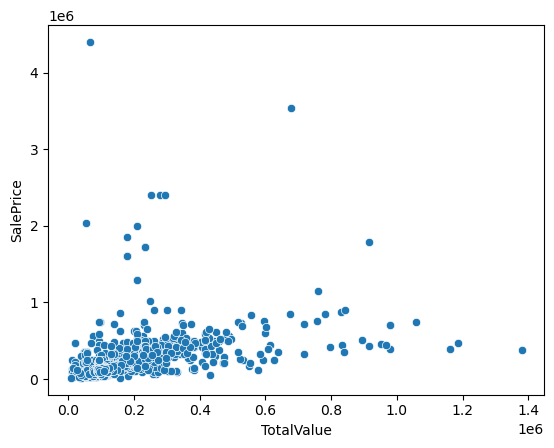

In [391]:
sns.scatterplot(data=Duplex, x='TotalValue', y='SalePrice')

<Axes: xlabel='LandValue', ylabel='SalePrice'>

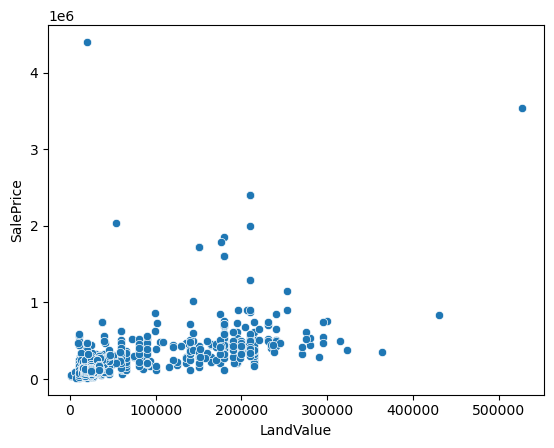

In [392]:
sns.scatterplot(data=Duplex, x='LandValue', y='SalePrice')

In [393]:
drop_idx_Dp=Duplex[(Duplex['TotalValue']<800000) & (Duplex['SalePrice']>3000000)].index

In [394]:
NH = NH.drop(drop_idx_Dp,axis=0)

### Analysis
Based on this data we can see theres 2 row data that indicating as outliers, so we gonna drop that. And for 89 remaining data , we are gonna keep this up.

In [395]:
NH_MH= (NH['LandUse']=='MOBILE HOME')
Mobile_Home = NH[NH_MH]
Mobile_Home

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
2067,45348,043 12 0 016.00,MOBILE HOME,2016-03-17,45000,No,0.25,17000.0,0.0,22300.0,NaN,NaN,NaN,NaN,1071 N DUPONT AVE,MADISON,2016,2016-Q1
2068,54654,043 12 0 016.00,MOBILE HOME,2016-09-26,60000,No,0.25,17000.0,0.0,22300.0,NaN,NaN,NaN,NaN,1071 N DUPONT AVE,MADISON,2016,2016-Q3
2300,34821,043 15 0 205.00,MOBILE HOME,2015-07-09,47000,No,0.13,15000.0,0.0,36100.0,NaN,NaN,NaN,NaN,1135 BUBBLING WELL RD,MADISON,2015,2015-Q3
2302,7047,043 15 0 210.00,MOBILE HOME,2013-08-12,20000,No,0.11,15000.0,0.0,32000.0,NaN,NaN,NaN,NaN,118 QUEEN ANNE DR,MADISON,2013,2013-Q3
2318,15587,043 16 0 091.00,MOBILE HOME,2014-05-19,23000,No,0.11,15000.0,0.0,29100.0,NaN,NaN,NaN,NaN,1225 LONDON BRIDGE RD,MADISON,2014,2014-Q2
2319,33092,043 16 0 112.00,MOBILE HOME,2015-06-02,19000,No,0.13,15000.0,0.0,21800.0,NaN,NaN,NaN,NaN,1221 BUBBLING WELL RD,MADISON,2015,2015-Q2
2320,26261,043 16 0 116.00,MOBILE HOME,2015-01-26,28000,No,0.18,15000.0,61700.0,76700.0,1994.0,3.0,2.0,0.0,1229 BUBBLING WELL RD,MADISON,2015,2015-Q1
2321,5846,043 16 0 126.00,MOBILE HOME,2013-07-12,20000,No,0.13,15000.0,0.0,23000.0,NaN,NaN,NaN,NaN,1230 BUBBLING WELL RD,MADISON,2013,2013-Q3
2322,43136,043 16 0 128.00,MOBILE HOME,2016-01-15,17000,Yes,0.11,15000.0,0.0,25000.0,NaN,NaN,NaN,NaN,1224 BUBBLING WELL RD,MADISON,2016,2016-Q1
2323,9832,043 16 0 133.00,MOBILE HOME,2013-11-06,14000,No,0.11,15000.0,0.0,29900.0,NaN,NaN,NaN,NaN,1214 BUBBLING WELL RD,MADISON,2013,2013-Q4


In [396]:
percentile25 = Mobile_Home['SalePrice'].quantile(0.25)
percentile75 = Mobile_Home['SalePrice'].quantile(0.75)

In [397]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [398]:
Mobile_Home[Mobile_Home['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
18571,13278,091 06 0 302.00,MOBILE HOME,2014-03-21,120000,No,0.1,45000.0,209400.0,258000.0,2014.0,3.0,3.0,0.0,5600 KENTUCKY AVE,NASHVILLE,2014,2014-Q1


In [399]:
Mobile_Home.corr(numeric_only=True)['SalePrice']

UniqueID        -0.005797
SalePrice        1.000000
Acreage          0.058686
LandValue        0.670738
BuildingValue    0.696837
TotalValue       0.724960
YearBuilt        0.428874
Bedrooms              NaN
FullBath         0.971488
HalfBath              NaN
SaleYear         0.059616
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

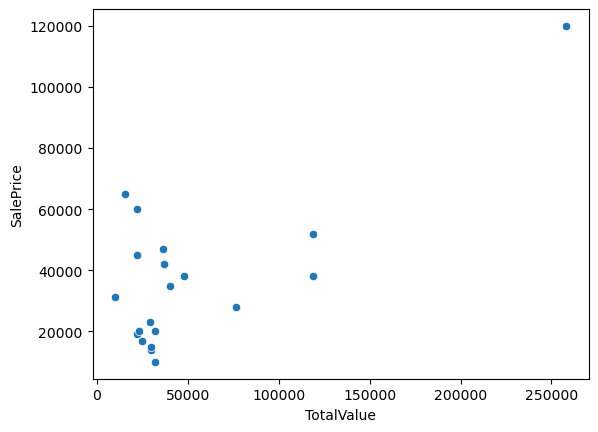

In [400]:
sns.scatterplot(data=Mobile_Home, x='TotalValue', y='SalePrice')

<Axes: xlabel='LandValue', ylabel='TotalValue'>

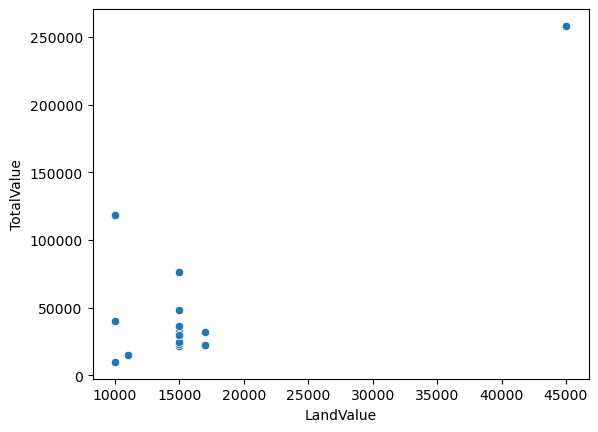

In [401]:
sns.scatterplot(data=Mobile_Home, x='LandValue', y='TotalValue')

### Analysis
Based On this data, I think we shouldn't drop the data because the data still in postive correlation and not have any suspicious data value, either in Sale Price or Total Value.

In [422]:
NH_SF= (NH['LandUse']=='SINGLE FAMILY') 
Single_Family =NH[NH_SF]
Single_Family

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
0,2045,007 00 0 125.00,SINGLE FAMILY,2013-04-09,240000,No,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,2013,2013-Q2
1,16918,007 00 0 130.00,SINGLE FAMILY,2014-06-10,366000,No,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,2014,2014-Q2
2,54582,007 00 0 138.00,SINGLE FAMILY,2016-09-26,435000,No,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,2016,2016-Q3
3,43070,007 00 0 143.00,SINGLE FAMILY,2016-01-29,255000,No,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,2016,2016-Q1
4,22714,007 00 0 149.00,SINGLE FAMILY,2014-10-10,278000,No,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,2014,2014-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56458,27706,188 10 0A 055.00,SINGLE FAMILY,2015-03-23,199900,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2027 OAK TRAIL DR,NOLENSVILLE,2015,2015-Q1
56465,51591,188 10 0A 086.00,SINGLE FAMILY,2016-07-22,170000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202 BIRDNEST ALY,NOLENSVILLE,2016,2016-Q3
56471,9492,188 10 0A 100.00,SINGLE FAMILY,2013-11-08,168000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437 WINDING CREEK DR,NOLENSVILLE,2013,2013-Q4
56472,30469,188 10 0A 101.00,SINGLE FAMILY,2015-05-27,157500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1435 WINDING CREEK DR,NOLENSVILLE,2015,2015-Q2


In [403]:
percentile25 = Single_Family['SalePrice'].quantile(0.25)
percentile75 = Single_Family['SalePrice'].quantile(0.75)

In [404]:
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [405]:
Single_Family[Single_Family['SalePrice'] > upper_limit]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
11,10754,007 14 0A 027.00,SINGLE FAMILY,2013-12-12,585000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109 BAILEY VIEW CT,GOODLETTSVILLE,2013,2013-Q4
1223,13363,041 02 0 013.00,SINGLE FAMILY,2014-03-28,728000,No,1.04,43600.0,179300.0,222900.0,1973.0,4.0,3.0,0.0,1413 BRECKENRIDGE CT,WHITES CREEK,2014,2014-Q1
2442,33356,044 11 0 186.00,SINGLE FAMILY,2015-06-30,583500,No,1.13,106300.0,436000.0,568500.0,1954.0,6.0,5.0,0.0,5 JONES CIR,OLD HICKORY,2015,2015-Q2
2443,56290,044 11 0 186.00,SINGLE FAMILY,2016-10-14,607500,No,1.13,106300.0,436000.0,568500.0,1954.0,6.0,5.0,0.0,5 JONES CIR,OLD HICKORY,2016,2016-Q4
2616,49053,044 15 0 422.00,SINGLE FAMILY,2016-05-09,629000,No,0.34,105000.0,240400.0,351100.0,1969.0,4.0,3.0,1.0,1007 RIVERSIDE RD,OLD HICKORY,2016,2016-Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55595,19243,182 01 0A 010.00,SINGLE FAMILY,2014-08-26,5491000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139 SUNDOWN DR,ANTIOCH,2014,2014-Q3
55614,19244,182 01 0A 065.00,SINGLE FAMILY,2014-08-26,5491000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929 MORNING RD,ANTIOCH,2014,2014-Q3
55802,19251,182 06 0A 311.00,SINGLE FAMILY,2014-08-26,5491000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8824 CRESSENT GLEN CT,ANTIOCH,2014,2014-Q3
55932,19254,183 05 0A 171.00,SINGLE FAMILY,2014-08-26,5491000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416 CATSPAW PL,ANTIOCH,2014,2014-Q3


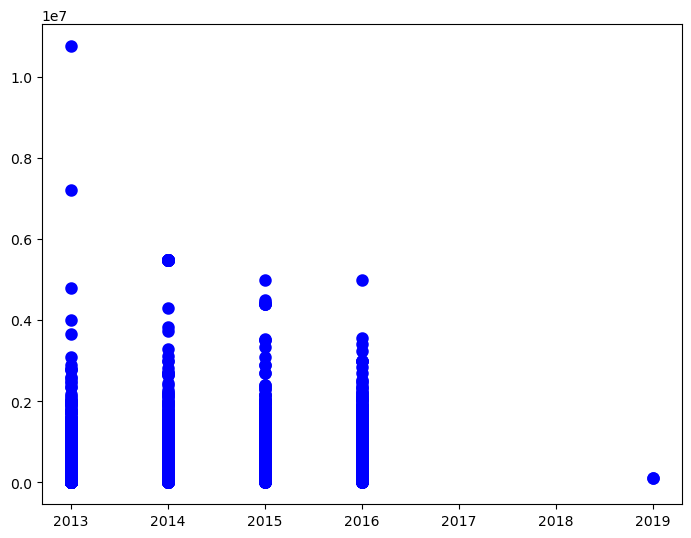

In [406]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Single_Family['SaleYear'],Single_Family['SalePrice'],color="blue",linewidth=3)
plt.show()

In [407]:
Single_Family[Single_Family['SaleYear']==2019]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
50719,53704,165 13 0A 057.00,SINGLE FAMILY,2019-05-16,118500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4501 STONEVIEW DR,ANTIOCH,2019,2019-Q2
50752,25542,165 14 0 047.00,SINGLE FAMILY,2019-12-13,118500,No,0.24,22000.0,67500.0,89500.0,1991.0,3.0,2.0,0.0,1133 BLUEWILLOW CT,ANTIOCH,2019,2019-Q4


In [408]:
NH[NH['SaleYear']== 2019]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
50719,53704,165 13 0A 057.00,SINGLE FAMILY,2019-05-16,118500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4501 STONEVIEW DR,ANTIOCH,2019,2019-Q2
50752,25542,165 14 0 047.00,SINGLE FAMILY,2019-12-13,118500,No,0.24,22000.0,67500.0,89500.0,1991.0,3.0,2.0,0.0,1133 BLUEWILLOW CT,ANTIOCH,2019,2019-Q4


In [409]:
drop_idx_2019 = NH[NH['SaleYear']== 2019].index

In the year 2019, we can see that there's only 2 rows contain in the entire data frame so we gonna drop this row.

In [410]:
NH = NH.drop(drop_idx_2019, axis=0)

In [411]:
NH[NH['SaleYear']== 2019]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter


In [412]:
NH.corr(numeric_only=True)['SalePrice']

UniqueID         0.023817
SalePrice        1.000000
Acreage          0.203151
LandValue        0.660889
BuildingValue    0.648100
TotalValue       0.736069
YearBuilt        0.039331
Bedrooms         0.377551
FullBath         0.520741
HalfBath         0.242784
SaleYear         0.039691
Name: SalePrice, dtype: float64

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

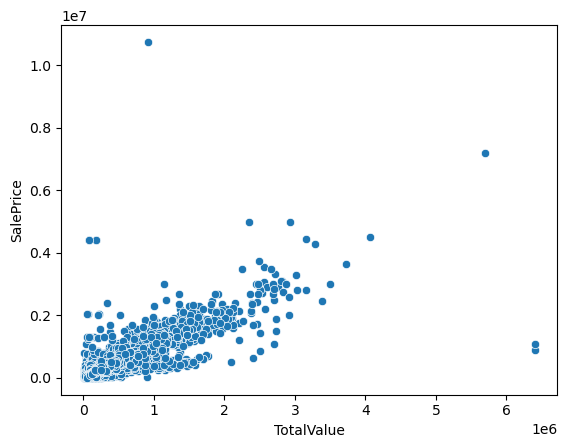

In [413]:
sns.scatterplot(data=Single_Family, x='TotalValue', y='SalePrice')

<Axes: xlabel='BuildingValue', ylabel='SalePrice'>

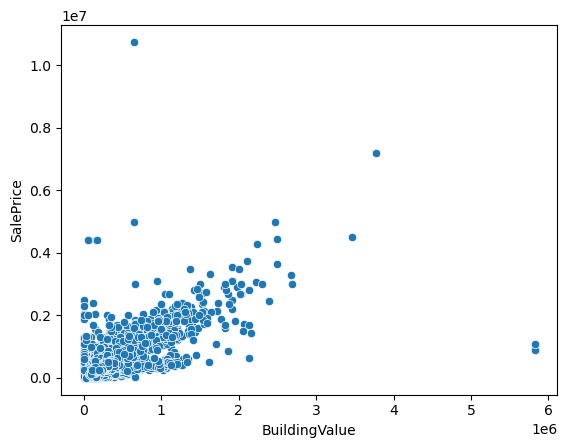

In [414]:
sns.scatterplot(data=Single_Family, x='BuildingValue', y='SalePrice')

In [415]:
Single_Family[(Single_Family['TotalValue']>5000000) & (Single_Family['SalePrice']<4000000)]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
38088,9674,132 06 0 036.00,SINGLE FAMILY,2013-11-15,905000,No,4.0,520000.0,5824300.0,6402600.0,2016.0,5.0,5.0,2.0,4225 FRANKLIN PIKE,NASHVILLE,2013,2013-Q4
38089,23769,132 06 0 036.00,SINGLE FAMILY,2014-11-17,1100000,No,4.0,520000.0,5824300.0,6402600.0,2016.0,5.0,5.0,2.0,4225 FRANKLIN PIKE,NASHVILLE,2014,2014-Q4


In [416]:
drop_idx_SF = Single_Family[(Single_Family['TotalValue']>6000000) & (Single_Family['SalePrice']<4000000)].index

In [417]:
NH = NH.drop(drop_idx_SF, axis=0)

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

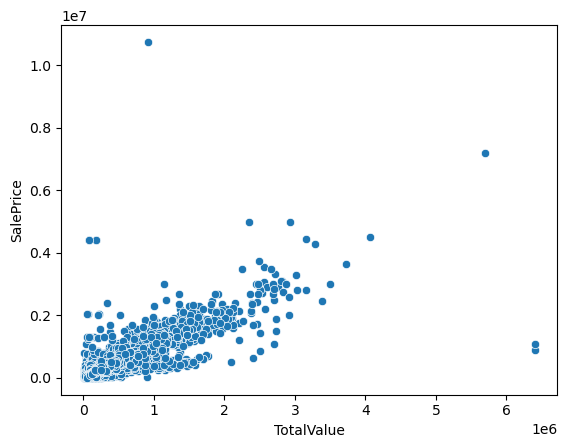

In [418]:
sns.scatterplot(data=Single_Family, x='TotalValue', y='SalePrice')

In [419]:
Single_Family[(Single_Family['TotalValue']<2000000) & (Single_Family['SalePrice']>10000000)]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
32142,4179,117 07 0 137.00,SINGLE FAMILY,2013-06-28,10750000,No,0.46,220000.0,650000.0,911800.0,1953.0,4.0,3.0,1.0,3428 STOKESMONT RD,NASHVILLE,2013,2013-Q2


In [420]:
drop_idx_SF = Single_Family[(Single_Family['TotalValue']<2000000) & (Single_Family['SalePrice']>10000000)].index

In [421]:
NH = NH.drop(drop_idx_SF,axis=0)

<Axes: xlabel='TotalValue', ylabel='SalePrice'>

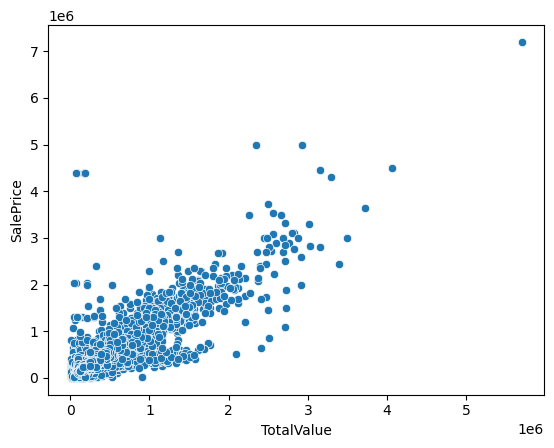

In [423]:
sns.scatterplot(data=Single_Family, x='TotalValue', y='SalePrice')

In [424]:
drop_idx_SF = Single_Family[(Single_Family['TotalValue']<1000000) & (Single_Family['SalePrice']>4000000)].index

In [425]:
NH = NH.drop(drop_idx_SF,axis=0)

### Analysis 
Based on this Single Family property type we can found many outliers and suspicious data that should be drop like some abnormal Sale Price and Total Value that seemingly impossible. Also there's 2 row data in 2019 that we gonna drop too because its gonna ruin our future analysis

# Data Visualization

In [459]:
NH_Sale_Year=NH.groupby(['SaleYear']).sum([''])['SalePrice']
NH_Sale_Year=NH_Sale_Year.reset_index()
NH_Sale_Year

,SaleYear,SalePrice
0,2013,2693610757
1,2014,4058418904
2,2015,6286990078
3,2016,4175003173


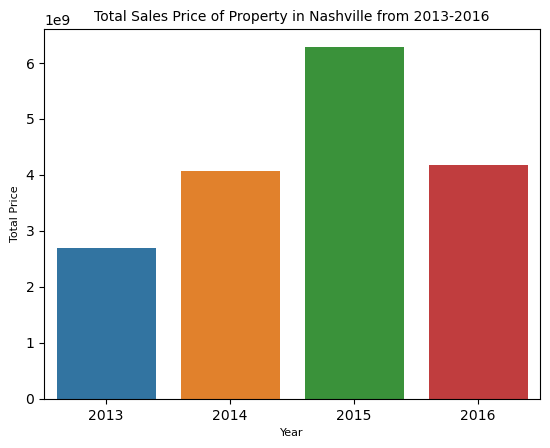

In [454]:
sns.barplot(data=NH_Sale_Year, x='SaleYear', y='SalePrice')
plt.title('Total Sales Price of Property in Nashville from 2013-2016',size=10)
plt.xlabel('Year',size=8)
plt.ylabel('Total Price',size=8)
plt.show()

In [475]:
NH_Total_Sale=NH.groupby(['SaleYear']).count()['SalePrice'].reset_index()
NH_Total_Sale

,SaleYear,SalePrice
0,2013,11176
1,2014,13981
2,2015,16410
3,2016,13849


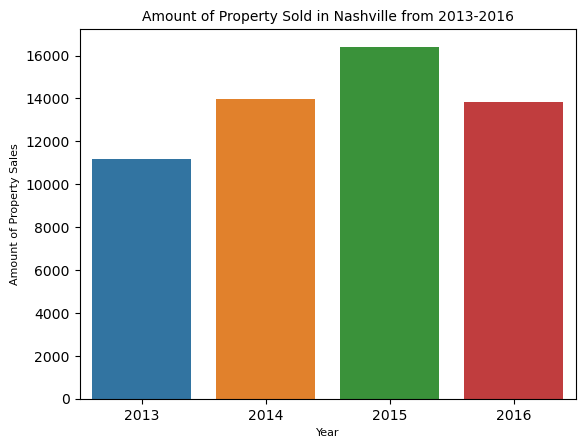

In [476]:
sns.barplot(data=NH_Total_Sale, x='SaleYear', y='SalePrice')
plt.title('Amount of Property Sold in Nashville from 2013-2016',size=10)
plt.xlabel('Year',size=8)
plt.ylabel('Amount of Property Sales',size=8)
plt.show()

In [477]:
NH_Median_SalePrice = NH.groupby(['SaleYear']).median([''])['SalePrice'].reset_index().sort_values('SalePrice',ascending=False)
NH_Median_SalePrice

,SaleYear,SalePrice
3,2016,230000.0
2,2015,210000.0
1,2014,192000.0
0,2013,179900.0


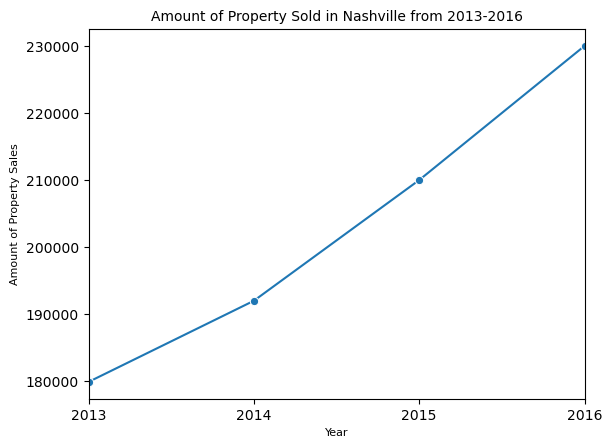

In [501]:
sns.lineplot(data=NH_Median_SalePrice, x='SaleYear', y='SalePrice',marker="o")
plt.title('Amount of Property Sold in Nashville from 2013-2016',size=10)
plt.xlim(2013,2016)
plt.xticks([2013,2014,2015,2016])
plt.xlabel('Year',size=8)
plt.ylabel('Amount of Property Sales',size=8)
plt.show()

From the graph of total sale property and amount of property sold we can see that on 2015 has the highest Total Sale and amount of property sold, but in 2016 , its decline significanly. According to the report by the U.S census bureau, 2015 is the highest housing market since 2007. But in the 2016, the market is slow down because the increase in sale price (as we can see in the median sale price per year data viz) and additional moves by the Federal Reserve to lift interest rates could dent the housing market's expansion going forward. Rate hikes make the cost of borrowing money more expensive, which naturally bumps up mortgage costs (usnews,2015) and makes the market slow down. So if we want to increase the market again, its depend on government's authority to decrease the interest rate of credit that can lift up the demand of property.

In [442]:
NH_City = NH['city'].value_counts()
NH_City = NH_City.reset_index()
NH_City

,city,count
0,NASHVILLE,39551
1,ANTIOCH,6151
2,HERMITAGE,3119
3,MADISON,1985
4,BRENTWOOD,1694
5,OLD HICKORY,1405
6,GOODLETTSVILLE,727
7,NOLENSVILLE,494
8,MOUNT JULIET,179
9,WHITES CREEK,97


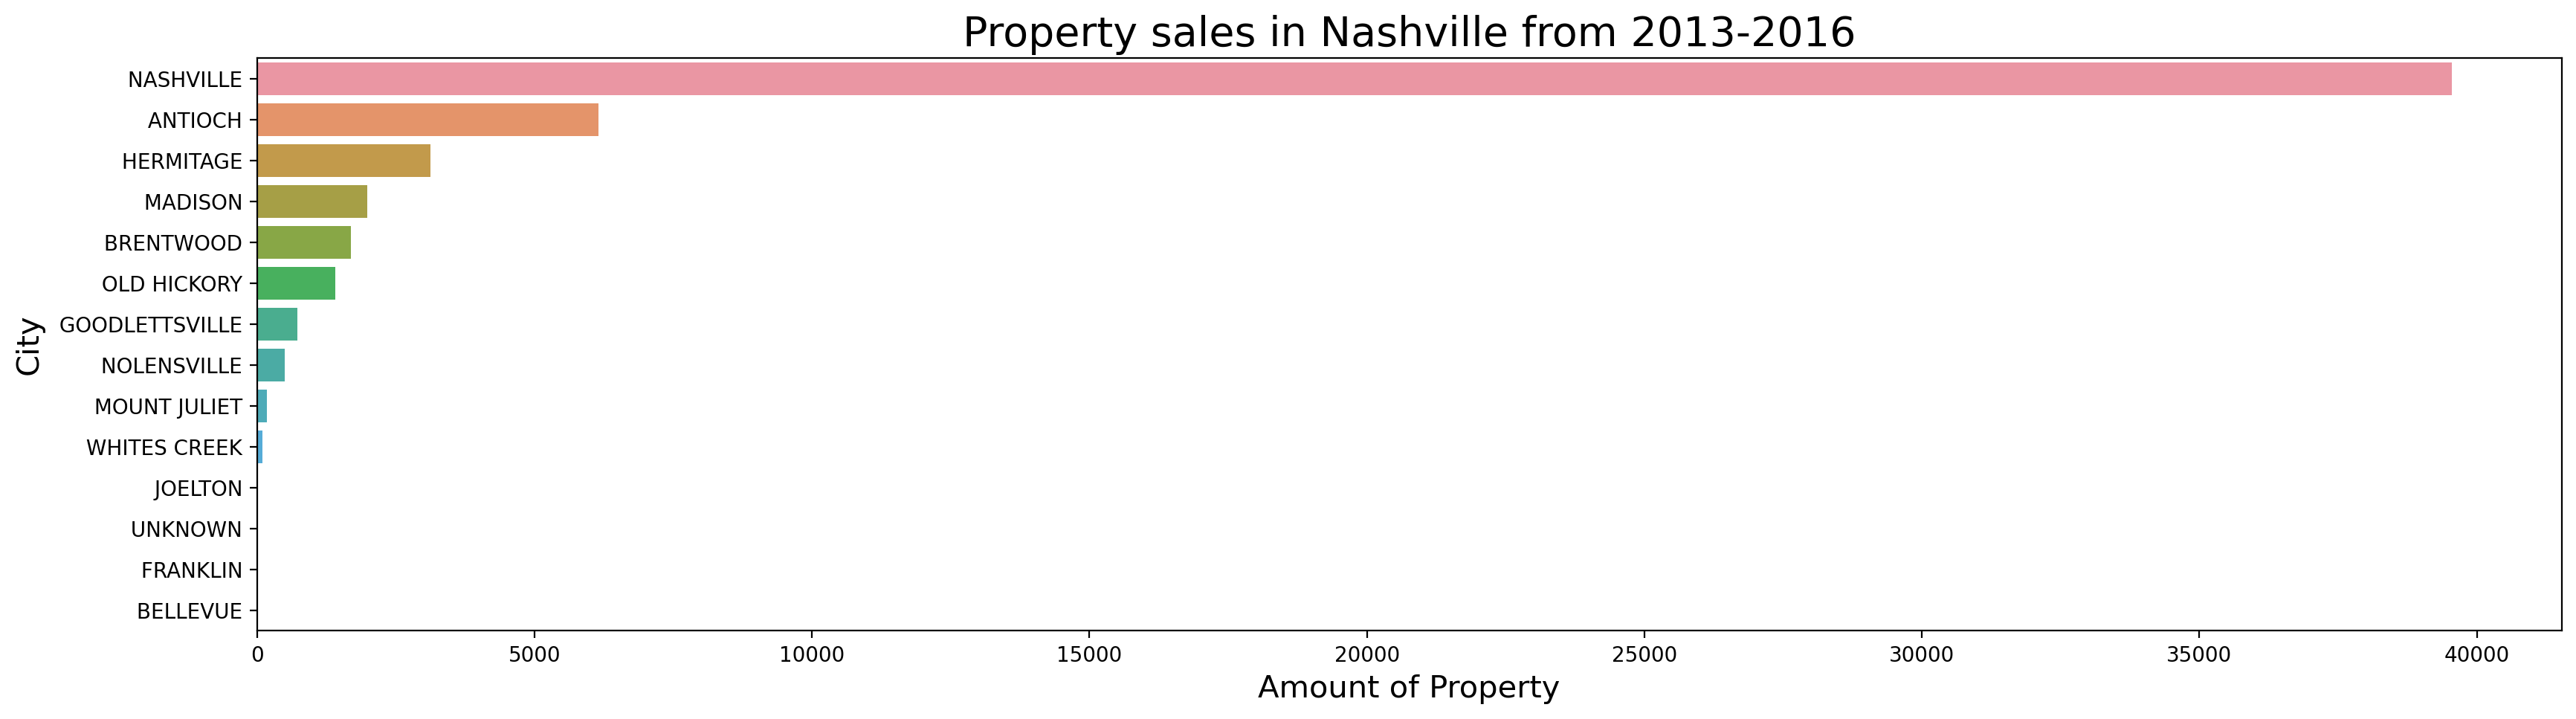

In [451]:
plt.figure(figsize=(20,5),dpi=200)
sns.barplot(data=NH_City, x='count',y='city')
plt.title('Property sales in Nashville from 2013-2016',size=20)
plt.xlabel('Amount of Property',size=15)
plt.ylabel('City',size=15)
plt.show()

As we can see that Nashville dominate the property market. Its make sense because Nashville is the most populated city in Tennessee , maybe its better to develop the others area that expected can improve the property market value in Tennessee.

In [506]:
NH_Under_Value = NH[(NH['SalePrice']-NH['TotalValue']<0)]
NH_Under_Value

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address,city,SaleYear,SaleQuarter
6,19804,007 14 0 002.00,SINGLE FAMILY,2014-08-28,171000,No,1.03,40000.0,137900.0,177900.0,1976.0,3.0,2.0,0.0,2005 SADIE LN,GOODLETTSVILLE,2014,2014-Q3
13,4512,007 15 0 002.00,SINGLE FAMILY,2013-06-07,189900,No,1.07,40000.0,203600.0,243600.0,2006.0,4.0,4.0,0.0,629 GAYLEMORE DR,GOODLETTSVILLE,2013,2013-Q2
21,46859,007 15 0 048.00,SINGLE FAMILY,2016-04-14,379900,No,2.61,52900.0,330700.0,383600.0,1997.0,5.0,4.0,1.0,2034 GRACELAND DR,GOODLETTSVILLE,2016,2016-Q2
22,5802,007 15 0 052.00,SINGLE FAMILY,2013-07-08,192500,No,1.10,40000.0,158000.0,198000.0,1989.0,3.0,3.0,0.0,811 BENTON CT,GOODLETTSVILLE,2013,2013-Q3
26,26215,012 00 0 082.00,SINGLE FAMILY,2015-01-26,162500,No,2.31,50000.0,119300.0,179200.0,1986.0,2.0,1.0,1.0,8154 OLD SPRINGFIELD PIKE,GOODLETTSVILLE,2015,2015-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54090,10167,176 05 0 063.00,SINGLE FAMILY,2013-11-22,150000,No,0.25,25000.0,140600.0,165600.0,1997.0,3.0,2.0,0.0,5032 SUNSHINE DR,ANTIOCH,2013,2013-Q4
54210,51558,180 00 0 081.00,SINGLE FAMILY,2016-07-08,258000,No,3.00,111000.0,155800.0,268000.0,1978.0,4.0,2.0,0.0,6640 HOLT RD,NASHVILLE,2016,2016-Q3
54212,20731,180 00 0 094.00,SINGLE FAMILY,2014-09-05,230000,No,3.03,111500.0,210400.0,321900.0,1980.0,3.0,2.0,0.0,6635 HOLT RD,NASHVILLE,2014,2014-Q3
54394,53992,181 00 0 036.00,VACANT RESIDENTIAL LAND,2016-09-30,200000,Yes,10.80,216000.0,0.0,216000.0,NaN,NaN,NaN,NaN,6079 CULBERTSON RD,ANTIOCH,2016,2016-Q3


In the table above, we can see that there's 6400 row of sale price that below the market value (Total Value). I think its can be happened because its lack of crucial data to assess as comparison for determined the market value like so many missing value in the Total Value column that makes the data set difficult to analyze. So, as a suggestion , its good to have capable property agent that can collect a useful parameters for analyze the market value precisely.